In [64]:
import pandas as pd

In [65]:
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df

In [66]:
# I need to make sure the nist vcf file has END column. The SVs are not visualized correctly without END in IGV.
nist_dipcall_del_hg38_vcf = read_vcf('/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/GRCh38_HG2-T2TQ100-V1.0_dipcall_passDEL.vcf')
nist_dipcall_del_hg38_vcf.head()

CHROM      POS ID                                                REF ALT  \
0  chr1   126241  .  ATAATGGGAGAATGTTGAAAACTCAGAGAGAAGAGCAACTCTCACA...   A   
1  chr1   180102  .  CCCTAACCCCTAATCCTAACCCTAATCCTAACCCTAACCCTAACCC...   C   
2  chr1   934064  .  AGGGGAGGCGGCTGCGTTACAGGTGGGCAGGGGAGGCGGCTCCGTT...   A   
3  chr1  1288543  .  TCCGTCCCCCGTGTCTCTGCTCCGTCCCCCGTGTCTCTGCTCCGTC...   T   
4  chr1  1349974  .  TGGGAGGAGTGAGGAGGGGGCCTGGACGGGGCAGGAGCGACGGGGG...   T   

   QUAL FILTER                                               INFO FORMAT  \
0    30   PASS                SVTYPE=DEL;SVLEN=38630;LCR=0.997927  GT:AD   
1    30   PASS  TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;T...  GT:AD   
2    30   PASS                  SVTYPE=DEL;SVLEN=840;LCR=0.846332  GT:AD   
3    30   PASS  TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT...  GT:AD   
4    30   PASS                 SVTYPE=DEL;SVLEN=1080;LCR=0.752907  GT:AD   

    SAMPLE  
0  1|1:0,2  
1  1|1:0,2  
2  1|1:0,2  
3  0|1:1,1  
4  1|1:0,2

In [68]:
# Add the END attribute that is required by IGV visualization
updated_info_field = []
for index, row in nist_dipcall_del_hg38_vcf.iterrows():
    info_list = row['INFO'].split(';')
    svlen= int([i.split('=')[1] for i in info_list if i.startswith('SVLEN=')][0])
    end_pos = row['POS'] + svlen
    # Extend the original info list with three new elements
    info_list.extend([f"END={end_pos}"])
    # Join the list
    updated_info = ';'.join(info_list)
    updated_info_field.append(updated_info)
updated_info_field

['SVTYPE=DEL;SVLEN=38630;LCR=0.997927;END=164871',
 'TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;TRFstart=180088;TRFend=180997;TRFperiod=6;TRFcopies=0.1;TRFscore=1716;TRFentropy=1.58;SVTYPE=DEL;SVLEN=880;RM_score=494;RM_repeat=(CCCTAA)N;RM_clsfam=Simple_repeat;LCR=0.789886;END=180982',
 'SVTYPE=DEL;SVLEN=840;LCR=0.846332;END=934904',
 'TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT;TRFovl=1;TRFstart=1288181;TRFend=1290252;TRFperiod=18;TRFcopies=69;TRFscore=4877;TRFentropy=1.55;SVTYPE=DEL;SVLEN=770;LCR=0.774556;END=1289313',
 'SVTYPE=DEL;SVLEN=1080;LCR=0.752907;END=1351054',
 'TRF;TRFdiff=-17.5;TRFrepeat=GTGTGTACGTGGGTGTTAGGTTGTAGGTACACAC;TRFovl=1;TRFstart=1934205;TRFend=1935601;TRFperiod=34;TRFcopies=24.7;TRFscore=3199;TRFentropy=1.86;SVTYPE=DEL;SVLEN=595;LCR=0.931031;END=1935584',
 'TRF;TRFdiff=-4.6;TRFrepeat=CCCCCAGGTGAGCATCTGACAGCCTGGAGCAGCACCCACA;TRFovl=0.21;TRFstart=2663159;TRFend=2667792;TRFperiod=40;TRFcopies=110.8;TRFscore=8850;TRFentropy=1.89;SVTYPE=DEL;SVLEN=883;LCR=0.9416;E

In [69]:
# Update INFO field
nist_dipcall_del_hg38_vcf['INFO'] = updated_info_field

In [70]:
nist_dipcall_del_hg38_vcf

CHROM       POS ID                                                REF  \
0     chr1    126241  .  ATAATGGGAGAATGTTGAAAACTCAGAGAGAAGAGCAACTCTCACA...   
1     chr1    180102  .  CCCTAACCCCTAATCCTAACCCTAATCCTAACCCTAACCCTAACCC...   
2     chr1    934064  .  AGGGGAGGCGGCTGCGTTACAGGTGGGCAGGGGAGGCGGCTCCGTT...   
3     chr1   1288543  .  TCCGTCCCCCGTGTCTCTGCTCCGTCCCCCGTGTCTCTGCTCCGTC...   
4     chr1   1349974  .  TGGGAGGAGTGAGGAGGGGGCCTGGACGGGGCAGGAGCGACGGGGG...   
...    ...       ... ..                                                ...   
1858  chrY  20284058  .  GGTATTGCTCACTTCAAGAATGAAGCTGCAGACCTTAGTGGTGAGT...   
1859  chrY  20298613  .  CTATGTCCAGAGTTTGTTCCTTCAGATGTGTCCAGAGTTTCTTCCT...   
1860  chrY  21739542  .  CNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1861  chrY  26095935  .  GAAAAAAAGATGCCTCATCTACAGTGCCTACAGTTATTATCATAGT...   
1862  chrY  26646933  .  TGAATGGAATGCGGTGAGTTGGAGGGCATTGGAATGGAGTTGAATG...   

     ALT  QUAL FILTER                                               INFO  \
0      A    30   PASS     SVTYPE=DEL;SVLEN=38630;LCR=0.997927;END=164871   
1      C    30   PASS  TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;T...   
2      A    30   PASS       SVTYPE=DEL;SVLEN=840;LCR=0.846332;END=934904   
3      T    30   PASS  TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT...   
4      T    30   PASS     SVTYPE=DEL;SVLEN=1080;LCR=0.752907;END=1351054   
...   ..   ...    ...                                                ...   
1858   G    30   PASS   SVTYPE=DEL;SVLEN=11374;LCR=0.977125;END=20295432   
1859   C    30   PASS  TRF;TRFdiff=-20.9;TRFrepeat=GTGTTATGTCCAGAGTTT...   
1860   C    30   PASS  SVTYPE=DEL;SVLEN=1816;LCR=0.00337635;END=21741358   
1861   G    30   PASS     SVTYPE=DEL;SVLEN=520;LCR=0.978697;END=26096455   
1862   T    30   PASS    SVTYPE=DEL;SVLEN=9433;LCR=0.889345;END=26656366   

     FORMAT   SAMPLE  
0     GT:AD  1|1:0,2  
1     GT:AD  1|1:0,2  
2     GT:AD  1|1:0,2  
3     GT:AD  0|1:1,1  
4     GT:AD  1|1:0,2  
...     ...      ...  
1858  GT:AD  1|.:0,1  
1859  GT:AD  1|.:0,1  
1860  GT:AD  1|.:0,1  
1861  GT:AD  1|.:0,1  
1862  GT:AD  1|.:0,1  

[1863 rows x 10 columns]

In [71]:
nist_del_intervals = [f"{row['CHROM']}:{row['POS']}-{row['INFO'].split(';END=')[1]}"for index, row in nist_dipcall_del_hg38_vcf.iterrows()]
nist_dipcall_del_hg38_vcf['interval'] = nist_del_intervals
nist_del_intervals[:5]

['chr1:126241-164871',
 'chr1:180102-180982',
 'chr1:934064-934904',
 'chr1:1288543-1289313',
 'chr1:1349974-1351054']

In [75]:
# Load the excluded file path
cnv_excluded_region_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1639/DRAGEN_exclude_intervals/NA24385.cnv.excluded_intervals.bed"
cnv_excluded_region_df = pd.read_csv(cnv_excluded_region_path, sep='\t', header=None, names=['CHROM', 'START', 'END','TYPE'])
#cnv_excluded_region_df
cnv_excluded_intervals = [f"{row['CHROM']}:{row['START']}-{row['END']}" for index, row in cnv_excluded_region_df.iterrows()]
cnv_excluded_intervals[:5]

['chr1:0-817860',
 'chr1:824221-832187',
 'chr1:834096-836556',
 'chr1:838510-842895',
 'chr1:850222-855342']

In [91]:
# Function for KMER-NONUNIQUE region check
import numpy as np
def non_unique_percentage(cnv_interval):
    chr, pos, end = v.parse_interval(cnv_interval)
    cnv_interval_size = v.interval_size(cnv_interval)
    # Collect all the gaps that have overlap with the DUP interval
    overlap_exclude_intervals = []
    for exclude_interval in cnv_excluded_intervals:
        gap_chr, gap_pos, gap_end = v.parse_interval(exclude_interval)
        if chr == gap_chr and pos >= gap_pos and end <= gap_end:
            overlap_exclude_intervals.append(exclude_interval)
    print("Overlap NON-KMER Unique intervals:", overlap_exclude_intervals)
    overlap_exclude_intervals_size = sum([v.interval_size(i) for i in overlap_exclude_intervals])
    exclude_overlap_percentage = np.round((overlap_exclude_intervals_size / cnv_interval_size) * 100, 2)
    # If the percentage is larger than 100, set it to 100
    if exclude_overlap_percentage > 100:
        exclude_overlap_percentage = 100
    return exclude_overlap_percentage

In [92]:
non_unique_percentage('chr1:2665980-2668511')

Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']


100

In [72]:
nist_dipcall_del_hg38_vcf

CHROM       POS ID                                                REF  \
0     chr1    126241  .  ATAATGGGAGAATGTTGAAAACTCAGAGAGAAGAGCAACTCTCACA...   
1     chr1    180102  .  CCCTAACCCCTAATCCTAACCCTAATCCTAACCCTAACCCTAACCC...   
2     chr1    934064  .  AGGGGAGGCGGCTGCGTTACAGGTGGGCAGGGGAGGCGGCTCCGTT...   
3     chr1   1288543  .  TCCGTCCCCCGTGTCTCTGCTCCGTCCCCCGTGTCTCTGCTCCGTC...   
4     chr1   1349974  .  TGGGAGGAGTGAGGAGGGGGCCTGGACGGGGCAGGAGCGACGGGGG...   
...    ...       ... ..                                                ...   
1858  chrY  20284058  .  GGTATTGCTCACTTCAAGAATGAAGCTGCAGACCTTAGTGGTGAGT...   
1859  chrY  20298613  .  CTATGTCCAGAGTTTGTTCCTTCAGATGTGTCCAGAGTTTCTTCCT...   
1860  chrY  21739542  .  CNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...   
1861  chrY  26095935  .  GAAAAAAAGATGCCTCATCTACAGTGCCTACAGTTATTATCATAGT...   
1862  chrY  26646933  .  TGAATGGAATGCGGTGAGTTGGAGGGCATTGGAATGGAGTTGAATG...   

     ALT  QUAL FILTER                                               INFO  \
0      A    30   PASS     SVTYPE=DEL;SVLEN=38630;LCR=0.997927;END=164871   
1      C    30   PASS  TRF;TRFdiff=-146.7;TRFrepeat=ACCCTA;TRFovl=1;T...   
2      A    30   PASS       SVTYPE=DEL;SVLEN=840;LCR=0.846332;END=934904   
3      T    30   PASS  TRF;TRFdiff=-42.8;TRFrepeat=CCCGTGTCTCTGCTCCGT...   
4      T    30   PASS     SVTYPE=DEL;SVLEN=1080;LCR=0.752907;END=1351054   
...   ..   ...    ...                                                ...   
1858   G    30   PASS   SVTYPE=DEL;SVLEN=11374;LCR=0.977125;END=20295432   
1859   C    30   PASS  TRF;TRFdiff=-20.9;TRFrepeat=GTGTTATGTCCAGAGTTT...   
1860   C    30   PASS  SVTYPE=DEL;SVLEN=1816;LCR=0.00337635;END=21741358   
1861   G    30   PASS     SVTYPE=DEL;SVLEN=520;LCR=0.978697;END=26096455   
1862   T    30   PASS    SVTYPE=DEL;SVLEN=9433;LCR=0.889345;END=26656366   

     FORMAT   SAMPLE                interval  
0     GT:AD  1|1:0,2      chr1:126241-164871  
1     GT:AD  1|1:0,2      chr1:180102-180982  
2     GT:AD  1|1:0,2      chr1:934064-934904  
3     GT:AD  0|1:1,1    chr1:1288543-1289313  
4     GT:AD  1|1:0,2    chr1:1349974-1351054  
...     ...      ...                     ...  
1858  GT:AD  1|.:0,1  chrY:20284058-20295432  
1859  GT:AD  1|.:0,1  chrY:20298613-20301229  
1860  GT:AD  1|.:0,1  chrY:21739542-21741358  
1861  GT:AD  1|.:0,1  chrY:26095935-26096455  
1862  GT:AD  1|.:0,1  chrY:26646933-26656366  

[1863 rows x 11 columns]

In [ ]:
# Classify events based on if they are within KMER non-unique regions 


In [9]:
import importlib
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.interval_list_evaluation as IntervalListEvaluation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import T2T_ACE.alignment_visualization_utilities as avu
import T2T_ACE.validator as v
import T2T_ACE.duplication_evaluation as DuplicationEvaluation

In [10]:
# Load Reference Genome
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        primary_hg38 = "/Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa" # primary assembly
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta" # assembly with alt contig

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38_alt = load_reference(ReferenceLocations.hg38)
hg38_primary = load_reference(ReferenceLocations.primary_hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/GRCh38.primary_assembly.genome.fa


In [106]:
nist_del_sum_df = IntervalListEvaluation.eval_interval_list(nist_del_intervals, ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38_primary, hg002t2t).classify_list_of_DELs()

chr1:126241-164871
DEL interval: chr1:126241-164871 38631
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 0
flanking_size: 11589, copy_threshold: 2
left flanking interval: chr1:114652-126241, 11590, 3, 2
right flanking interval: chr1:164871-176460, 11590, 4, 0
flanking_size: 12589, copy_threshold: 2
left flanking interval: chr1:113652-126241, 12590, 3, 2
right flanking interval: chr1:164871-177460, 12590, 3, 0
flanking_size: 13589, copy_threshold: 2
left flanking interval: chr1:112652-126241, 13590, 3, 2
right flanking interval: chr1:164871-178460, 13590, 2, 0
flanking_size: 14589, copy_threshold: 2
left flanking interval: chr1:111652-126241, 14590, 3, 2
right flanking interval: chr1:164871-179460, 14590, 1, 0
flanking_size: 15589, copy_threshold: 2
left flanking interval: chr1:110652-126241, 15590, 3, 1
right flanking interval: chr1:164871-180460, 15590, 1, 0
flanking_size: 16589, copy_threshold: 2
left flanking interval: chr1:109652-126241, 16590, 4, 0
right flanki

In [107]:
nist_del_sum_df['major_classification'].value_counts()

major_classification
DEL          1516
False DEL     190
Unknown       157
Name: count, dtype: int64

In [108]:
len(nist_del_sum_df)

1863

In [112]:
genotype_dict = {row['interval']:row['SAMPLE'].split(':')[0] for index, row in nist_dipcall_del_hg38_vcf.iterrows()}
genotype_dict

{'chr1:126241-164871': '1|1',
 'chr1:180102-180982': '1|1',
 'chr1:934064-934904': '1|1',
 'chr1:1288543-1289313': '0|1',
 'chr1:1349974-1351054': '1|1',
 'chr1:1934989-1935584': '1|0',
 'chr1:2662456-2663339': '1|0',
 'chr1:2665980-2668511': '1|0',
 'chr1:2694985-2695628': '0|1',
 'chr1:2696763-2697688': '0|1',
 'chr1:2750145-2750788': '0|1',
 'chr1:2750874-2753403': '0|1',
 'chr1:3299666-3300276': '1|1',
 'chr1:3643863-3644373': '1|1',
 'chr1:4065139-4066241': '0|1',
 'chr1:13004897-13075112': '1|0',
 'chr1:13008067-13025445': '0|1',
 'chr1:13025617-13037973': '0|1',
 'chr1:14110577-14112444': '1|0',
 'chr1:14331214-14331990': '1|0',
 'chr1:16744928-16746692': '0|1',
 'chr1:24478046-24480950': '0|1',
 'chr1:24832196-24835018': '1|1',
 'chr1:26642257-26643325': '1|1',
 'chr1:26643547-26646498': '1|1',
 'chr1:27853406-27853977': '1|1',
 'chr1:30567797-30568812': '0|1',
 'chr1:36958604-36960147': '0|1',
 'chr1:38618549-38620153': '1|0',
 'chr1:43106314-43107075': '0|1',
 'chr1:45710241-

In [114]:
nist_del_sum_df['genotype'] = nist_del_sum_df['del_interval'].map(genotype_dict)

In [115]:
nist_del_sum_df.head()

del_interval  del_interval_size  flanking_size  \
0    chr1:126241-164871              38631          39589   
1    chr1:180102-180982                881          11000   
2    chr1:934064-934904                841           2000   
3  chr1:1288543-1289313                771           3000   
4  chr1:1349974-1351054               1081           2000   

  left_flanking_interval right_flanking_interval  left_flanking_hg38_hits  \
0      chr1:86652-126241      chr1:164871-204460                        1   
1     chr1:169102-180102      chr1:180982-191982                        1   
2     chr1:932064-934064      chr1:934904-936904                        1   
3   chr1:1285543-1288543    chr1:1289313-1292313                        1   
4   chr1:1347974-1349974    chr1:1351054-1353054                        1   

   right_flanking_hg38_hits  left_flanking_hg2_hits  right_flanking_hg2_hits  \
0                         1                       0                        0   
1                         2                       0                        0   
2                         1                       2                        2   
3                         1                       2                        2   
4                         1                       2                        2   

  distance_between_flankings flanking_connection_strand major_classification  \
0                         []                         []              Unknown   
1                         []                         []              Unknown   
2                   [-1, -1]                 [POS, POS]                  DEL   
3               [2973, -475]                 [POS, POS]                  DEL   
4                   [-1, -1]                 [POS, POS]                  DEL   

  minor_classification genotype  
0              Unknown      1|1  
1              Unknown      1|1  
2       Homozygous DEL      1|1  
3     Heterozygous DEL      0|1  
4       Homozygous DEL      1|1

In [117]:
nist_del_sum_df.to_csv('/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/T2T-ACE-nist_del_sum_df.csv',index=False)

In [94]:
# Load the previous summary file
# And annotate the non-unique percentage
nist_del_sum_df = pd.read_csv('/Users/gaoyueya/Documents/Projects/TAG-Ticket1789/HG2T2T_v1/T2T-ACE-nist_del_sum_df.csv')
nist_del_sum_df.head()

del_interval  del_interval_size  flanking_size  \
0    chr1:126241-164871              38631          39589   
1    chr1:180102-180982                881          11000   
2    chr1:934064-934904                841           2000   
3  chr1:1288543-1289313                771           3000   
4  chr1:1349974-1351054               1081           2000   

  left_flanking_interval right_flanking_interval  left_flanking_hg38_hits  \
0      chr1:86652-126241      chr1:164871-204460                        1   
1     chr1:169102-180102      chr1:180982-191982                        1   
2     chr1:932064-934064      chr1:934904-936904                        1   
3   chr1:1285543-1288543    chr1:1289313-1292313                        1   
4   chr1:1347974-1349974    chr1:1351054-1353054                        1   

   right_flanking_hg38_hits  left_flanking_hg2_hits  right_flanking_hg2_hits  \
0                         1                       0                        0   
1                         2                       0                        0   
2                         1                       2                        2   
3                         1                       2                        2   
4                         1                       2                        2   

  distance_between_flankings flanking_connection_strand major_classification  \
0                         []                         []              Unknown   
1                         []                         []              Unknown   
2                   [-1, -1]             ['POS', 'POS']                  DEL   
3               [2973, -475]             ['POS', 'POS']                  DEL   
4                   [-1, -1]             ['POS', 'POS']                  DEL   

  minor_classification genotype  
0              Unknown      1|1  
1              Unknown      1|1  
2       Homozygous DEL      1|1  
3     Heterozygous DEL      0|1  
4       Homozygous DEL      1|1

In [95]:
nist_del_sum_df['non_unique_percentage'] = nist_del_sum_df['del_interval'].map(non_unique_percentage)
nist_del_sum_df.head()

Overlap NON-KMER Unique intervals: ['chr1:0-817860']
Overlap NON-KMER Unique intervals: ['chr1:0-817860']
Overlap NON-KMER Unique intervals: []
Overlap NON-KMER Unique intervals: ['chr1:1287957-1290805']
Overlap NON-KMER Unique intervals: ['chr1:1349903-1352344']
Overlap NON-KMER Unique intervals: []
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:2653075-2777731']
Overlap NON-KMER Unique intervals: ['chr1:3298832-3300875']
Overlap NON-KMER Unique intervals: []
Overlap NON-KMER Unique intervals: []
Overlap NON-KMER Unique intervals: ['chr1:12859473-13107479']
Overlap NON-KMER Unique intervals: ['chr1:12859473-13107479']
Overlap NON-KMER Unique intervals: ['chr1:12859473-13107479']
Overlap NON-KMER

del_interval  del_interval_size  flanking_size  \
0    chr1:126241-164871              38631          39589   
1    chr1:180102-180982                881          11000   
2    chr1:934064-934904                841           2000   
3  chr1:1288543-1289313                771           3000   
4  chr1:1349974-1351054               1081           2000   

  left_flanking_interval right_flanking_interval  left_flanking_hg38_hits  \
0      chr1:86652-126241      chr1:164871-204460                        1   
1     chr1:169102-180102      chr1:180982-191982                        1   
2     chr1:932064-934064      chr1:934904-936904                        1   
3   chr1:1285543-1288543    chr1:1289313-1292313                        1   
4   chr1:1347974-1349974    chr1:1351054-1353054                        1   

   right_flanking_hg38_hits  left_flanking_hg2_hits  right_flanking_hg2_hits  \
0                         1                       0                        0   
1                         2                       0                        0   
2                         1                       2                        2   
3                         1                       2                        2   
4                         1                       2                        2   

  distance_between_flankings flanking_connection_strand major_classification  \
0                         []                         []              Unknown   
1                         []                         []              Unknown   
2                   [-1, -1]             ['POS', 'POS']                  DEL   
3               [2973, -475]             ['POS', 'POS']                  DEL   
4                   [-1, -1]             ['POS', 'POS']                  DEL   

  minor_classification genotype  non_unique_percentage  
0              Unknown      1|1                  100.0  
1              Unknown      1|1                  100.0  
2       Homozygous DEL      1|1                    0.0  
3     Heterozygous DEL      0|1                  100.0  
4       Homozygous DEL      1|1                  100.0

In [97]:
nist_del_sum_df['non_unique_percentage'].value_counts()

non_unique_percentage
100.0    963
0.0      900
Name: count, dtype: int64

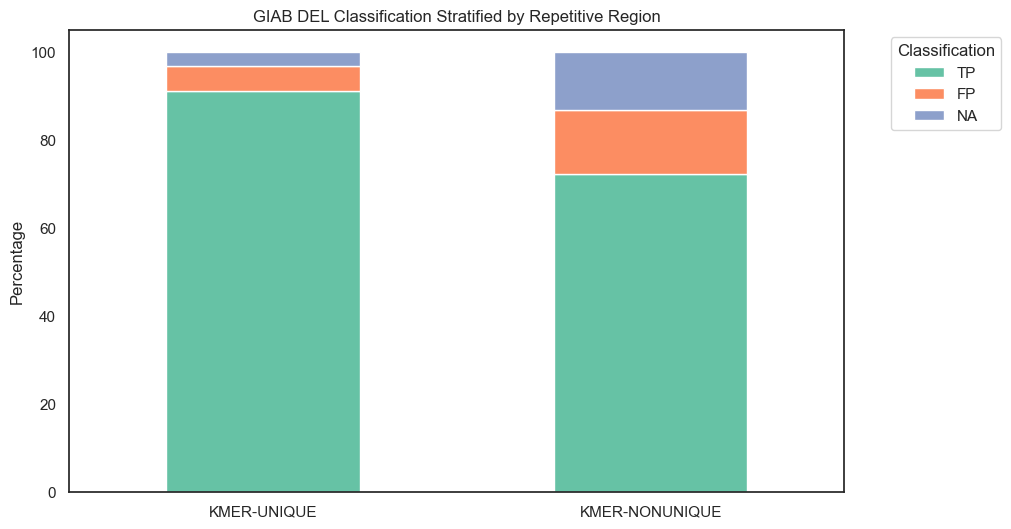

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming nist_del_sum_df is your DataFrame
# Use groupby to get counts for each combination of non_unique_percentage and major_classification
counts_df = nist_del_sum_df.groupby(['non_unique_percentage', 'major_classification']).size().unstack(fill_value=0)
counts_df.columns = ['TP', 'FP', 'NA']
counts_df.index.name = 'Non-Unique Percentage'
counts_df.index = ["KMER-UNIQUE", "KMER-NONUNIQUE"]

# Normalize each row to get percentages
percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

# Plot stacked bar plot
f,ax = plt.subplots(figsize=(10, 5))
percentages_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette('Set2'), ax=ax)

# Customize labels and legend
ax.set_title('GIAB DEL Classification Stratified by Repetitive Region')
ax.set_xlabel('')
ax.set_ylabel('Percentage')
#plt.xticks(ticks=[0,100],labels=['0%', '100%'])#,rotation=0)  # Rotate x-axis labels for better visibility
ax.set_xticklabels(["KMER-UNIQUE", "KMER-NONUNIQUE"], rotation=0)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.show()
plt.savefig('/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_vs_rep_region',bbox_inches='tight')


In [308]:
counts_df

TP   FP   NA
KMER-UNIQUE     820   51   29
KMER-NONUNIQUE  696  139  128

In [188]:
nist_del_sum_df.to_csv('/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/T2T-ACE-nist_del_sum_w_excludedRegion.csv',index=False)

In [11]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [42]:
test_dict = v.collect_del_flankings("chr1:26642257-26646498", ReferenceLocations.primary_hg38, hg38_primary, hg002t2t)
test_dict.keys()

DEL interval: chr1:26642257-26646498 4242
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:26640257-26642257, 2001, 1, 2
right flanking interval: chr1:26646498-26648498, 2001, 2, 4
----------- No DEL Evidence -----------
chr1_MATERNAL:26798820-26800821 (2002bp), chr1_MATERNAL:26792581-26794581 (2001bp), 4238
----------- No DEL Evidence -----------
chr1_PATERNAL:26836162-26838163 (2002bp), chr1_PATERNAL:26829922-26831922 (2001bp), 4239
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_MATERNAL:26794580-26798821; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:26794582-26798819; Overlapping:(100.0, 99.91)
*DEL HG2 alignment:chr1_PATERNAL:26831921-26836163; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:26831923-26836161; Overlapping:(100.0, 99.91)


dict_keys(['del_interval', 'del_interval_size', 'flanking_size', 'left_flanking_interval', 'right_flanking_interval', 'left_flanking_hg38_hits', 'right_flanking_hg38_hits', 'left_flanking_hg2_hits', 'right_flanking_hg2_hits', 'distance_between_flankings', 'flanking_connection_strand', 'hg38_plotting_flanking_intervals', 'hg2_plotting_flanking_intervals', 'classification', 'minor_classification'])

In [41]:
test_dict['left_flanking_interval']

'chr1:26640257-26642257'

In [45]:
# Write a+c concat
from T2T_ACE.genomic_queries import get_sequence_from_interval
left_flank_seq = get_sequence_from_interval(ReferenceLocations.primary_hg38, test_dict['left_flanking_interval'])
right_flank_seq = get_sequence_from_interval(ReferenceLocations.primary_hg38, test_dict['right_flanking_interval'])
merged_flanking_seq = left_flank_seq+right_flank_seq

In [193]:
hg2_test_ac_match = [[v.extract_interval_from_hit(_), _.strand, _.cigar] for _ in hg002t2t.map(merged_flanking_seq)]# if (_.q_en - _.q_st + 1)*0.8 < (_.r_en - _.r_st + 1) < (_.q_en - _.q_st + 1)*1.2 ]
hg2_test_ac_match

[['chr1_PATERNAL:26829922-26838163',
  -1,
  [[74, 0], [1, 2], [81, 0], [2, 1], [1844, 0], [4240, 2], [2001, 0]]],
 ['chr1_MATERNAL:26792581-26800821',
  -1,
  [[74, 0], [1, 2], [81, 0], [2, 1], [1844, 0], [4239, 2], [2001, 0]]]]

In [330]:
def get_ac_mat_cigar(del_interval, plot_path=None):
    del_interval_dict = v.collect_del_flankings(del_interval, ReferenceLocations.primary_hg38, hg38_primary, hg002t2t)
    left_flank_seq = get_sequence_from_interval(ReferenceLocations.primary_hg38, del_interval_dict['left_flanking_interval'])
    right_flank_seq = get_sequence_from_interval(ReferenceLocations.primary_hg38, del_interval_dict['right_flanking_interval'])
    merged_flanking_seq = left_flank_seq+right_flank_seq
    hg2_ac_match = [[v.extract_interval_from_hit(_), _.strand, _.cigar] for _ in hg002t2t.map(merged_flanking_seq)]
    hg2_ac_match_cigar = [i[-1] for i in hg2_ac_match]
    cigar_sum_dict = {}
    for i in hg2_ac_match:
        print(i[-1])
        del_list = []
        match_list = []
        ins_list = []
        # Get the cigar string and calculate the sum of del, match and ins
        for j in i[-1]:
            if int(j[1]) == 2:
                del_list.append(int(j[0]))
            elif int(j[1]) == 0:
                match_list.append(int(j[0]))
            elif int(j[1]) == 1:
                ins_list.append(int(j[0]))
        cigar_sum_dict[i[0]] = [v.interval_size(i[0]), sum(del_list), sum(match_list), sum(ins_list)]
    print (cigar_sum_dict)
    # if len(hg2_ac_match) == 0:
    #     return "No alignment found"
    # elif len(hg2_ac_match) == 1:
    #     current_x = 0
    #     for item in hg2_ac_match[0][-1]:
    #         if item[1] == 0:
    #             plt.plot([current_x, current_x + item[0]], [0, 0], color='green', linewidth=5)  # Green line
    #         elif item[1] == 1:
    #             plt.plot([current_x, current_x + item[0]], [0, 0], color='red', linewidth=5)    # Red line
    #         elif item[1] == 2:
    #             plt.plot([current_x, current_x + item[0]], [0, 0], color='blue', linewidth=5)   # Blue line
    #         current_x += item[0]  # Update current x-coordinate
    #     plt.text(current_x/2, 0.1, hg2_ac_match[0][0], horizontalalignment='center', verticalalignment='center', fontsize=12)
    #     # Set axis limits and labels
    #     plt.xlim(0, current_x + 200)  # Adding a buffer for better visualization
    #     plt.ylim(-0.5, 0.5)
    #     plt.xlabel('')
    #     plt.ylabel('')
    #     plt.show()
    # elif len(hg2_ac_match) == 2:
    #     current_x1 = 0
    #     current_x2 = 0 # Initialize current x-coordinate
    #     
    #     # Plot lines for the first dataset
    #     for item in hg2_ac_match[0][-1]:
    #         if item[1] == 0:
    #             plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='green', linewidth=5)  # Green line
    #         elif item[1] == 1:
    #             plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='red', linewidth=5)    # Red line
    #         elif item[1] == 2:
    #             plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='blue', linewidth=5)   # Blue line
    #         current_x1 += item[0]  # Update current x-coordinate
    #     
    #     # Plot lines for the second dataset
    #     for item in hg2_ac_match[-1][-1]:
    #         if item[1] == 0:
    #             plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='green', linewidth=5)  # Green line
    #         elif item[1] == 1:
    #             plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='red', linewidth=5)    # Red line
    #         elif item[1] == 2:
    #             plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='blue', linewidth=5)   # Blue line
    #         current_x2 += item[0]  # Update current x-coordinate
    #         
    #     plt.text(current_x1/2, 0.1, hg2_ac_match[0][0], horizontalalignment='center', verticalalignment='center', fontsize=12)    
    #     plt.text(current_x2/2, 1.1, hg2_ac_match[-1][0], horizontalalignment='center', verticalalignment='center', fontsize=12)
    #     plt.text((max(current_x1,current_x2)+200)/2, 0.55, f"Alleged DEL Size: {v.interval_size(del_interval)}bp", horizontalalignment='center', verticalalignment='center', fontsize=12)
    #     
    #     # Set axis limits and labels
    #     plt.xlim(-200, max(current_x1,current_x2) + 200)  # Adding a buffer for better visualization
    #     plt.ylim(-0.5, 1.5)
    #     plt.xlabel('')
    #     plt.ylabel('')
    #     plt.suptitle(f"Merged Flanking Region Alignments \n {del_interval}", fontsize=14, fontweight='bold')
    #     
    # # Show plot
    # plt.savefig(f'{plot_path}/{del_interval}.png',bbox_inches='tight')
    return hg2_ac_match

In [347]:
def plot_alignment(hg2_ac_match, del_interval):
    if len(hg2_ac_match) == 0:
        return "No alignment found"
    elif len(hg2_ac_match) == 1:
        current_x = 0
        for item in hg2_ac_match[0][-1]:
            if item[1] == 0:
                plt.plot([current_x, current_x + item[0]], [0, 0], color='green', linewidth=5)  # Green line
            elif item[1] == 1:
                plt.plot([current_x, current_x + item[0]], [0, 0], color='red', linewidth=5)    # Red line
            elif item[1] == 2:
                plt.plot([current_x, current_x + item[0]], [0, 0], color='blue', linewidth=5)   # Blue line
            current_x += item[0]  # Update current x-coordinate
        plt.text(current_x/2, 0.1, hg2_ac_match[0][0], horizontalalignment='center', verticalalignment='center', fontsize=12)
        # Set axis limits and labels
        plt.xlim(0, current_x + 200)  # Adding a buffer for better visualization
        plt.ylim(-0.5, 0.5)
        plt.xlabel('')
        plt.ylabel('')
        plt.show()
    else:
        plt.figure(figsize=(10, 5))
        for i, alignment in enumerate(hg2_ac_match):
            current_x = 0
            for item in alignment[-1]:
                if item[1] == 0:
                    plt.plot([current_x, current_x + item[0]], [i, i], color='green', linewidth=5)  # Green line
                elif item[1] == 1:
                    plt.plot([current_x, current_x + item[0]], [i, i], color='red', linewidth=5)    # Red line
                elif item[1] == 2:
                    plt.plot([current_x, current_x + item[0]], [i, i], color='blue', linewidth=5)   # Blue line
                current_x += item[0]  # Update current x-coordinate
            plt.text(current_x/2, i + 0.1, alignment[0], horizontalalignment='center', verticalalignment='center', fontsize=12)
        # plt.text((current_x + 200)/2, len(hg2_ac_match)/2-0.6, f"Alleged DEL Size: {v.interval_size(del_interval)}bp", horizontalalignment='center', verticalalignment='center', fontsize=12)
        # Set axis limits and labels
        plt.xlim(-200, current_x + 200)  # Adding a buffer for better visualization
        plt.ylim(-0.5, len(hg2_ac_match)-0.5)
        plt.xlabel('')
        plt.ylabel('')
        plt.suptitle(f"Merged Flanking Region Alignments \n {del_interval} ({v.interval_size(del_interval)}bp)", fontsize=14, fontweight='bold')
        plt.show()


DEL interval: chr2:87421544-87422170 627
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 4
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr2:87419544-87421544, 2001, 1, 4
right flanking interval: chr2:87422170-87424170, 2001, 1, 3
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr2_MATERNAL:87444559-87446586 (2028bp), chr2_MATERNAL:87448495-87450550 (2056bp), 1908
----------- No DEL Evidence -----------
chr2_PATERNAL:87449608-87451662 (2055bp), chr2_PATERNAL:87465270-87467375 (2106bp), 13607
----------- No DEL Evidence -----------
chr2_PATERNAL:87460803-87462857 (2055bp), chr2_PATERNAL:87465270-87467375 (2106bp), 2412
----------- No DEL Evidence -----------
chr2_PATERNAL:87457110-87459137 (2028bp), chr2_PATERNAL:87465270-87467375 (2106bp), 6132
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr2_MATERNAL:87452352-87453005; Interval Between HG2 Aligned Flankings:chr2_MATERNAL:87446587-8744

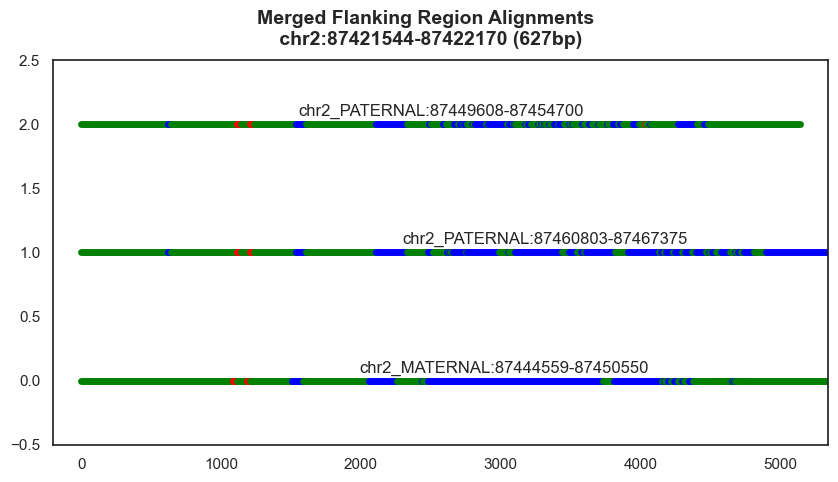

In [348]:
plot_alignment(get_ac_mat_cigar("chr2:87421544-87422170"), "chr2:87421544-87422170")

In [324]:
# Grab some FPs in non-unique regions
non_rep_fp_del_df = nist_del_sum_df[(nist_del_sum_df['non_unique_percentage']==0)&(nist_del_sum_df['major_classification']=='False DEL')]
non_rep_fp_del_df.to_csv('/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/non_rep_fp_del_df.csv',index=False)

del_interval  del_interval_size  flanking_size  \
23       chr1:26642257-26643325               1069           2000   
24       chr1:26643547-26646498               2952           2000   
129        chr2:1532028-1532706                679           2000   
173      chr2:90392931-90396986               4056           2000   
195    chr2:138247431-138251018               3588           2000   
234    chr2:238870561-238871147                587           2000   
258      chr3:44699521-44700766               1246           2000   
351    chr3:198099262-198099810                549           2000   
368      chr4:19519807-19520379                573           2000   
415      chr4:68516025-68627294             111270         122397   
416      chr4:69291589-69292687               1099          11000   
417      chr4:69293619-69294185                567          11000   
419      chr4:69384088-69403439              19352           5805   
445    chr4:114586663-114589884               3222          11000   
446    chr4:114589947-114592708               2762          11000   
593    chr5:118539683-118541736               2054          11000   
594    chr5:118541761-118542725                965          11000   
627    chr5:179637376-179639973               2598           2000   
639      chr6:12431797-12432446                650           2000   
654      chr6:31041445-31042315                871           2000   
667      chr6:32547134-32548486               1353          11000   
669      chr6:32655747-32656847               1101          11000   
670      chr6:32657124-32658092                969          11000   
711    chr6:106721333-106723005               1673           2000   
751          chr7:566678-567340                663           2000   
776      chr7:40839778-40840870               1093           2000   
810      chr7:76515456-76527666              12211           3663   
903    chr8:102423274-102423789                516           2000   
922    chr8:144021630-144022477                848           5000   
1118    chr11:89922470-89923786               1317           2000   
1133  chr11:131680806-131681622                817           2000   
1151    chr12:11088810-11089524                715           3000   
1152    chr12:11092714-11098150               5437           2000   
1154    chr12:12392003-12393583               1581           2000   
1194  chr12:127545252-127545778                527           2000   
1199  chr12:131647596-131650383               2788          11000   
1256    chr13:46460725-46464056               3332          11000   
1257    chr13:46464970-46466140               1171          11000   
1294    chr14:24010410-24015777               5368           2000   
1367    chr15:77038405-77040380               1976           2000   
1394    chr16:29226811-29227349                539           2000   
1621    chr20:28836876-28838252               1377           2000   
1668    chr20:30136242-30140758               4517           2000   
1708    chr21:26001843-26002385                543           2000   
1710    chr21:40028841-40033178               4338           2000   
1728    chr22:18731642-18732954               1313           6000   
1763       chrX:1083904-1084438                535           8000   
1814   chrX:103989429-104005591              16163           4848   
1815   chrX:104010616-104011203                588           2000   
1816   chrX:104042388-104042969                582           2000   
1817   chrX:104046122-104047456               1335           2000   

         left_flanking_interval    right_flanking_interval  \
23       chr1:26640257-26642257     chr1:26643325-26645325   
24       chr1:26641547-26643547     chr1:26646498-26648498   
129        chr2:1530028-1532028       chr2:1532706-1534706   
173      chr2:90390931-90392931     chr2:90396986-90398986   
195    chr2:138245431-138247431   chr2:138251018-138253018   
234    chr2:238868561-238870561   chr2:238871147-238873147

DEL interval: chr1:1934989-1935584 596
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:1932989-1934989, 2001, 1, 2
right flanking interval: chr1:1935584-1937584, 2001, 1, 2
merged flanking sequence: 4002, ['chr1_MATERNAL:1370272-1374870', 'chr1_PATERNAL:1376204-1380208']
----------- No DEL Evidence -----------
chr1_MATERNAL:1370272-1372273 (2002bp), chr1_MATERNAL:1372867-1374870 (2004bp), 593
********** Potential DEL **********
chr1_PATERNAL:1376204-1378225 (2022bp), chr1_PATERNAL:1378207-1380208 (2002bp), -19
[[2001, 0], [594, 2], [284, 0], [2, 2], [1717, 0]]
[[1272, 0], [34, 2], [181, 0], [4, 2], [178, 0], [34, 1], [241, 0], [4, 1], [64, 0], [2, 2], [27, 0], [1, 1], [1322, 0], [1, 2], [678, 0]]
{'chr1_MATERNAL:1370272-1374870': [4599, 596, 4002, 0], 'chr1_PATERNAL:1376204-1380208': [4005, 41, 3963, 39]}


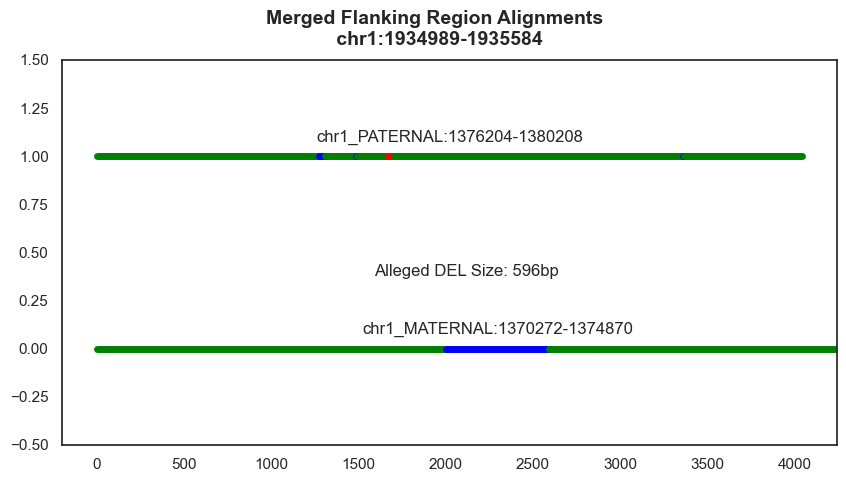

In [344]:
plot_alignment(get_ac_mat_cigar("chr1:1934989-1935584"), "chr1:1934989-1935584")

DEL interval: chr1:26642257-26646498 4242
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:26640257-26642257, 2001, 1, 2
right flanking interval: chr1:26646498-26648498, 2001, 2, 4
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr1_MATERNAL:26798820-26800821 (2002bp), chr1_MATERNAL:26792581-26794581 (2001bp), 4238
----------- No DEL Evidence -----------
chr1_PATERNAL:26836162-26838163 (2002bp), chr1_PATERNAL:26829922-26831922 (2001bp), 4239
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_MATERNAL:26794580-26798821; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:26794582-26798819; Overlapping:(100.0, 99.91)
*DEL HG2 alignment:chr1_PATERNAL:26831921-26836163; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:26831923-26836161; Overlapping:(100.0, 99.91)
[[74, 0], [1, 2], [81, 0], [2, 1], [1844, 0], [4240, 2], [2001, 0]]
[[74,

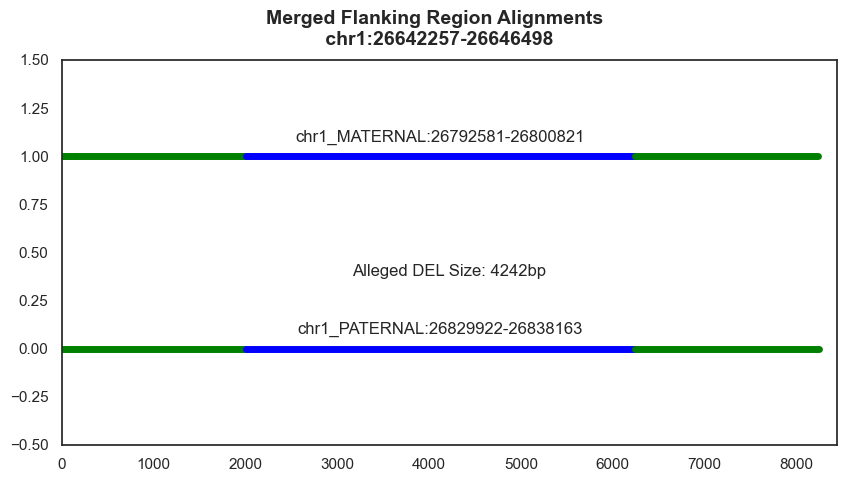

In [341]:
plot_alignment(get_ac_mat_cigar("chr1:26642257-26646498"),"chr1:26642257-26646498")

DEL interval: chr1:45710241-45710903 663
DEL interval Alignments in hg38: 3
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:45708241-45710241, 2001, 1, 2
right flanking interval: chr1:45710903-45712903, 2001, 1, 2
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr1_PATERNAL:45931952-45933955 (2004bp), chr1_PATERNAL:45936618-45938618 (2001bp), 2662
----------- No DEL Evidence -----------
chr1_MATERNAL:45898056-45900063 (2008bp), chr1_MATERNAL:45902328-45904328 (2001bp), 2264
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_PATERNAL:45933558-45934221; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(9.99, 40.06)
DEL HG2 alignment:chr1_PATERNAL:45933164-45933823; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(-4.96, -20.0)
DEL HG2 alignment:chr1_MATERNAL:45899272-45899931; Interval Between HG2 Alig

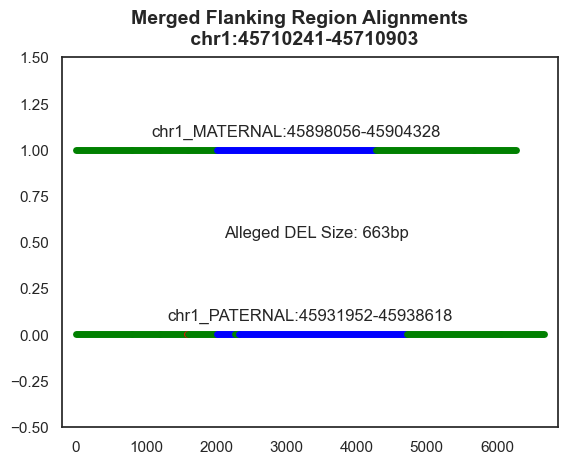

In [301]:
get_ac_mat_cigar("chr1:45710241-45710903")

DEL interval: chr1:56365434-56369289 3856
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 4
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:56363434-56365434, 2001, 1, 2
right flanking interval: chr1:56369289-56371289, 2001, 1, 2
merged flanking sequence: 4002, ['chr1_MATERNAL:56567277-56571278']
----------- No DEL Evidence -----------
chr1_PATERNAL:56596192-56598193 (2002bp), chr1_PATERNAL:56602048-56604049 (2002bp), 3854
********** Potential DEL **********
chr1_MATERNAL:56567277-56569278 (2002bp), chr1_MATERNAL:56569278-56571278 (2001bp), -1


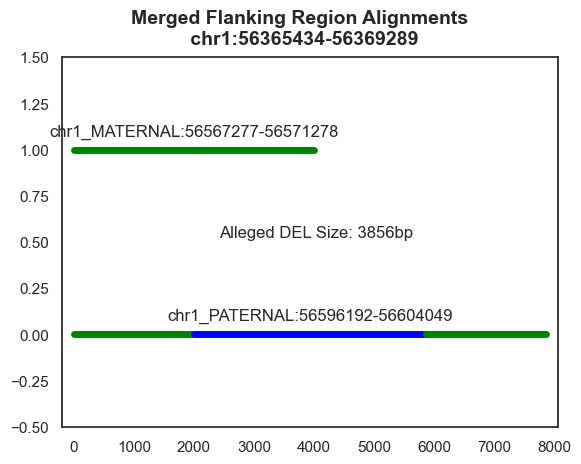

In [302]:
get_ac_mat_cigar("chr1:56365434-56369289")

DEL interval: chr1:61617185-61618029 845
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:61615185-61617185, 2001, 1, 2
right flanking interval: chr1:61618029-61620029, 2001, 1, 2
merged flanking sequence: 4002, ['chr1_MATERNAL:61816604-61820599', 'chr1_PATERNAL:61847666-61851651']
********** Potential DEL **********
chr1_MATERNAL:61816604-61818601 (1998bp), chr1_MATERNAL:61818601-61820599 (1999bp), -1
********** Potential DEL **********
chr1_PATERNAL:61847666-61849653 (1988bp), chr1_PATERNAL:61849653-61851651 (1999bp), -1


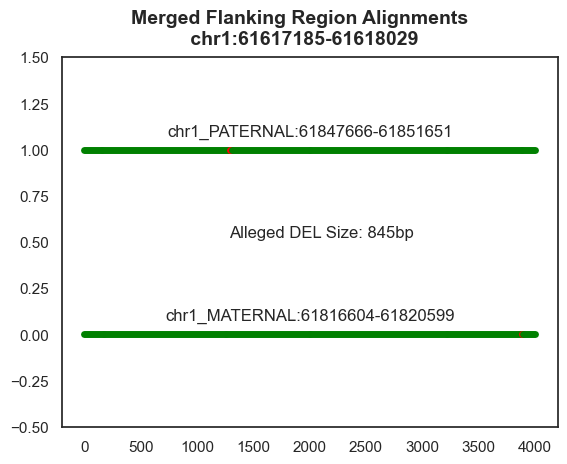

In [303]:
get_ac_mat_cigar("chr1:61617185-61618029")

DEL interval: chr2:138247431-138251018 3588
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr2:138245431-138247431, 2001, 1, 2
right flanking interval: chr2:138251018-138253018, 2001, 1, 2
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr2_MATERNAL:138126420-138128421 (2002bp), chr2_MATERNAL:138132007-138134008 (2002bp), 3585
----------- No DEL Evidence -----------
chr2_PATERNAL:137886802-137888776 (1975bp), chr2_PATERNAL:137892366-137894343 (1978bp), 3589
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr2_MATERNAL:138128420-138132008; Interval Between HG2 Aligned Flankings:chr2_MATERNAL:138128422-138132006; Overlapping:(100.0, 99.89)
*DEL HG2 alignment:chr2_PATERNAL:137888776-137892365; Interval Between HG2 Aligned Flankings:chr2_PATERNAL:137888777-137892365; Overlapping:(100.0, 99.97)


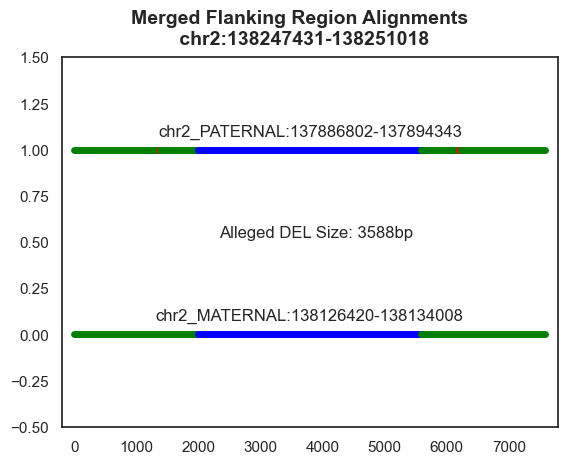

In [304]:
get_ac_mat_cigar("chr2:138247431-138251018")

DEL interval: chr2:238870561-238871147 587
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr2:238868561-238870561, 2001, 1, 2
right flanking interval: chr2:238871147-238873147, 2001, 1, 2
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr2_MATERNAL:238769748-238771825 (2078bp), chr2_MATERNAL:238774035-238776035 (2001bp), 2209
----------- No DEL Evidence -----------
chr2_PATERNAL:238536968-238539020 (2053bp), chr2_PATERNAL:238542675-238544678 (2004bp), 3654
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr2_MATERNAL:238774034-238774584; Interval Between HG2 Aligned Flankings:chr2_MATERNAL:238771826-238774034; Overlapping:(0.05, 0.18)
*DEL HG2 alignment:chr2_PATERNAL:238542674-238543227; Interval Between HG2 Aligned Flankings:chr2_PATERNAL:238539021-238542674; Overlapping:(0.03, 0.18)


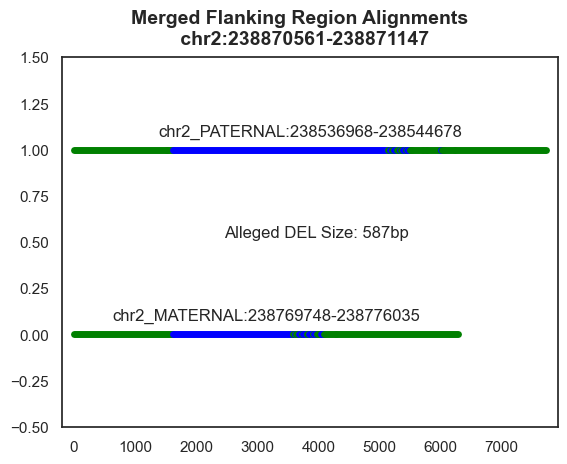

In [305]:
get_ac_mat_cigar("chr2:238870561-238871147")

DEL interval: chr2:4165088-4175888 10801
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 3240, copy_threshold: 2
left flanking interval: chr2:4161848-4165088, 3241, 1, 2
right flanking interval: chr2:4175888-4179128, 3241, 1, 2
merged flanking sequence: 6482, ['chr2_MATERNAL:4185308-4191951']
----------- No DEL Evidence -----------
chr2_PATERNAL:4187925-4191166 (3242bp), chr2_PATERNAL:4201975-4205216 (3242bp), 10808
********** Potential DEL **********
chr2_MATERNAL:4185308-4188543 (3236bp), chr2_MATERNAL:4188711-4191951 (3241bp), 167


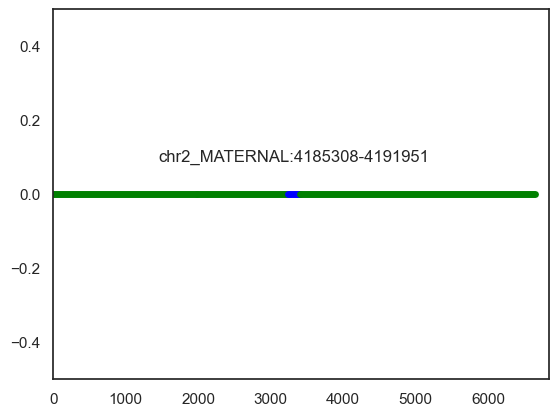

In [317]:
get_ac_mat_cigar("chr2:4165088-4175888")

DEL interval: chr2:34470763-34511500 40738
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 12221, copy_threshold: 2
left flanking interval: chr2:34458542-34470763, 12222, 1, 2
right flanking interval: chr2:34511500-34523721, 12222, 1, 2
merged flanking sequence: 24444, ['chr2_PATERNAL:34527463-34551916']
----------- No DEL Evidence -----------
chr2_MATERNAL:34499912-34512136 (12225bp), chr2_MATERNAL:34552832-34565058 (12227bp), 40695
********** Potential DEL **********
chr2_PATERNAL:34527463-34539686 (12224bp), chr2_PATERNAL:34539694-34551916 (12223bp), 7


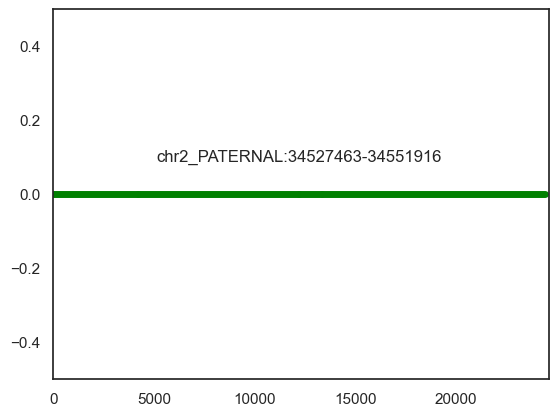

In [318]:
get_ac_mat_cigar("chr2:34470763-34511500")

DEL interval: chr2:35750918-35772076 21159
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 6347, copy_threshold: 2
left flanking interval: chr2:35744571-35750918, 6348, 1, 2
right flanking interval: chr2:35772076-35778423, 6348, 1, 2
merged flanking sequence: 12696, ['chr2_MATERNAL:35785530-35798203']
----------- No DEL Evidence -----------
chr2_PATERNAL:35772592-35778940 (6349bp), chr2_PATERNAL:35800097-35806445 (6349bp), 21156
********** Potential DEL **********
chr2_MATERNAL:35785530-35791853 (6324bp), chr2_MATERNAL:35791853-35798203 (6351bp), -1


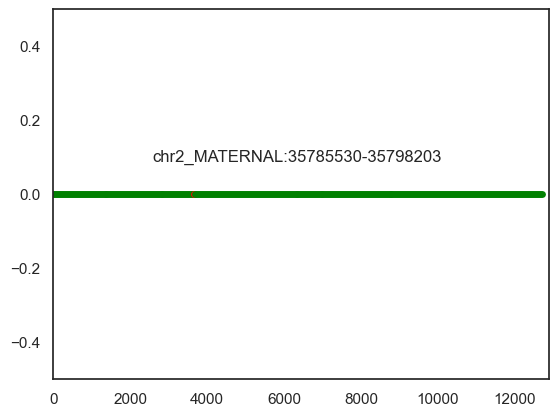

In [319]:
get_ac_mat_cigar("chr2:35750918-35772076")

In [320]:
get_ac_mat_cigar("chr2:87421544-87422170")

DEL interval: chr2:87421544-87422170 627
DEL interval Alignments in hg38: 2
DEL interval Alignments in HG2: 4
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr2:87419544-87421544, 2001, 1, 4
right flanking interval: chr2:87422170-87424170, 2001, 1, 3
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr2_MATERNAL:87444559-87446586 (2028bp), chr2_MATERNAL:87448495-87450550 (2056bp), 1908
----------- No DEL Evidence -----------
chr2_PATERNAL:87449608-87451662 (2055bp), chr2_PATERNAL:87465270-87467375 (2106bp), 13607
----------- No DEL Evidence -----------
chr2_PATERNAL:87460803-87462857 (2055bp), chr2_PATERNAL:87465270-87467375 (2106bp), 2412
----------- No DEL Evidence -----------
chr2_PATERNAL:87457110-87459137 (2028bp), chr2_PATERNAL:87465270-87467375 (2106bp), 6132
----------- Checking DEL Sequence Alignment in HG2 -----------
DEL HG2 alignment:chr2_MATERNAL:87452352-87453005; Interval Between HG2 Aligned Flankings:chr2_MATERNAL:87446587-8744

DEL interval: chr2:138247431-138251018 3588
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr2:138245431-138247431, 2001, 1, 2
right flanking interval: chr2:138251018-138253018, 2001, 1, 2
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr2_MATERNAL:138126420-138128421 (2002bp), chr2_MATERNAL:138132007-138134008 (2002bp), 3585
----------- No DEL Evidence -----------
chr2_PATERNAL:137886802-137888776 (1975bp), chr2_PATERNAL:137892366-137894343 (1978bp), 3589
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr2_MATERNAL:138128420-138132008; Interval Between HG2 Aligned Flankings:chr2_MATERNAL:138128422-138132006; Overlapping:(100.0, 99.89)
*DEL HG2 alignment:chr2_PATERNAL:137888776-137892365; Interval Between HG2 Aligned Flankings:chr2_PATERNAL:137888777-137892365; Overlapping:(100.0, 99.97)


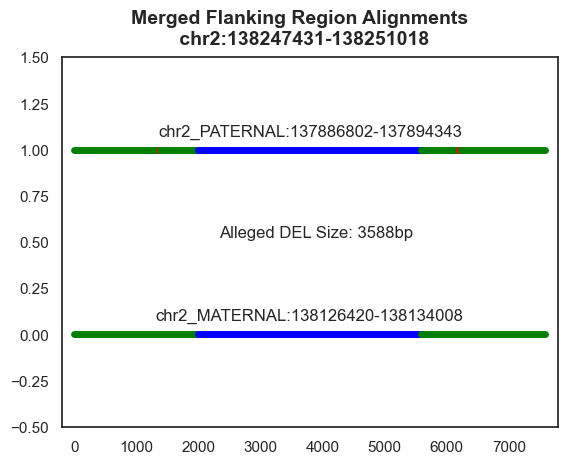

In [321]:
get_ac_mat_cigar("chr2:138247431-138251018")

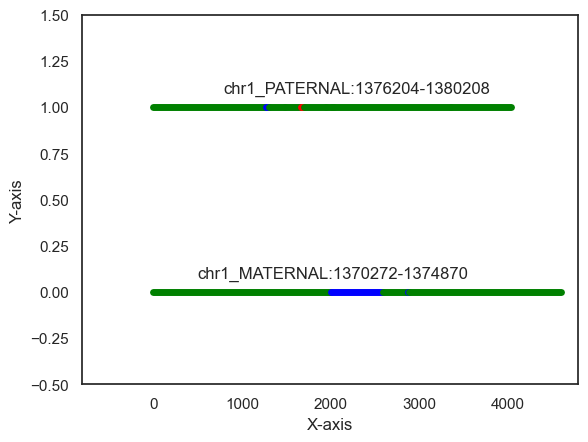

In [267]:
import matplotlib.pyplot as plt

data1 = [[2001, 0], [594, 2], [284, 0], [2, 2], [1717, 0]]
data2 = [[1272, 0], [34, 2], [181, 0], [4, 2], [178, 0], [34, 1], [241, 0], [4, 1], [64, 0], [2, 2], [27, 0], [1, 1], [1322, 0], [1, 2], [678, 0]]

current_x1 = 0
current_x2 = 0 # Initialize current x-coordinate

# Plot lines for the first dataset
for item in data1:
    if item[1] == 0:
        plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='green', linewidth=5)  # Green line
    elif item[1] == 1:
        plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='red', linewidth=5)    # Red line
    elif item[1] == 2:
        plt.plot([current_x1, current_x1 + item[0]], [0, 0], color='blue', linewidth=5)   # Blue line
    current_x1 += item[0]  # Update current x-coordinate

# Plot lines for the second dataset
for item in data2:
    if item[1] == 0:
        plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='green', linewidth=5)  # Green line
    elif item[1] == 1:
        plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='red', linewidth=5)    # Red line
    elif item[1] == 2:
        plt.plot([current_x2, current_x2 + item[0]], [1, 1], color='blue', linewidth=5)   # Blue line
    current_x2 += item[0]  # Update current x-coordinate
    
plt.text(current_x1/2, 1.1, 'chr1_PATERNAL:1376204-1380208', horizontalalignment='center', verticalalignment='center', fontsize=12)    
plt.text(current_x2/2, 0.1, 'chr1_MATERNAL:1370272-1374870', horizontalalignment='center', verticalalignment='center', fontsize=12)

# Set axis limits and labels
plt.xlim(-800, max(current_x1,current_x2) + 200)  # Adding a buffer for better visualization
plt.ylim(-0.5, 1.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show plot
plt.show()


In [237]:
test_list = [[2001, 0], [594, 2], [284, 0], [2, 2], [1717, 0]]
for i in test_list:
    if i[1] == 2:
        print(i[0])

594
2


In [203]:
for i in test_ac_output[0][-1]:
    if i[1] == 2:
        print(i[0])

594
2


In [54]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

DEL interval: chr1:26642257-26646498 4242
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:26640257-26642257, 2001, 1, 2
right flanking interval: chr1:26646498-26648498, 2001, 2, 4
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr1_MATERNAL:26798820-26800821 (2002bp), chr1_MATERNAL:26792581-26794581 (2001bp), 4238
----------- No DEL Evidence -----------
chr1_PATERNAL:26836162-26838163 (2002bp), chr1_PATERNAL:26829922-26831922 (2001bp), 4239
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_MATERNAL:26794580-26798821; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:26794582-26798819; Overlapping:(100.0, 99.91)
*DEL HG2 alignment:chr1_PATERNAL:26831921-26836163; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:26831923-26836161; Overlapping:(100.0, 99.91)


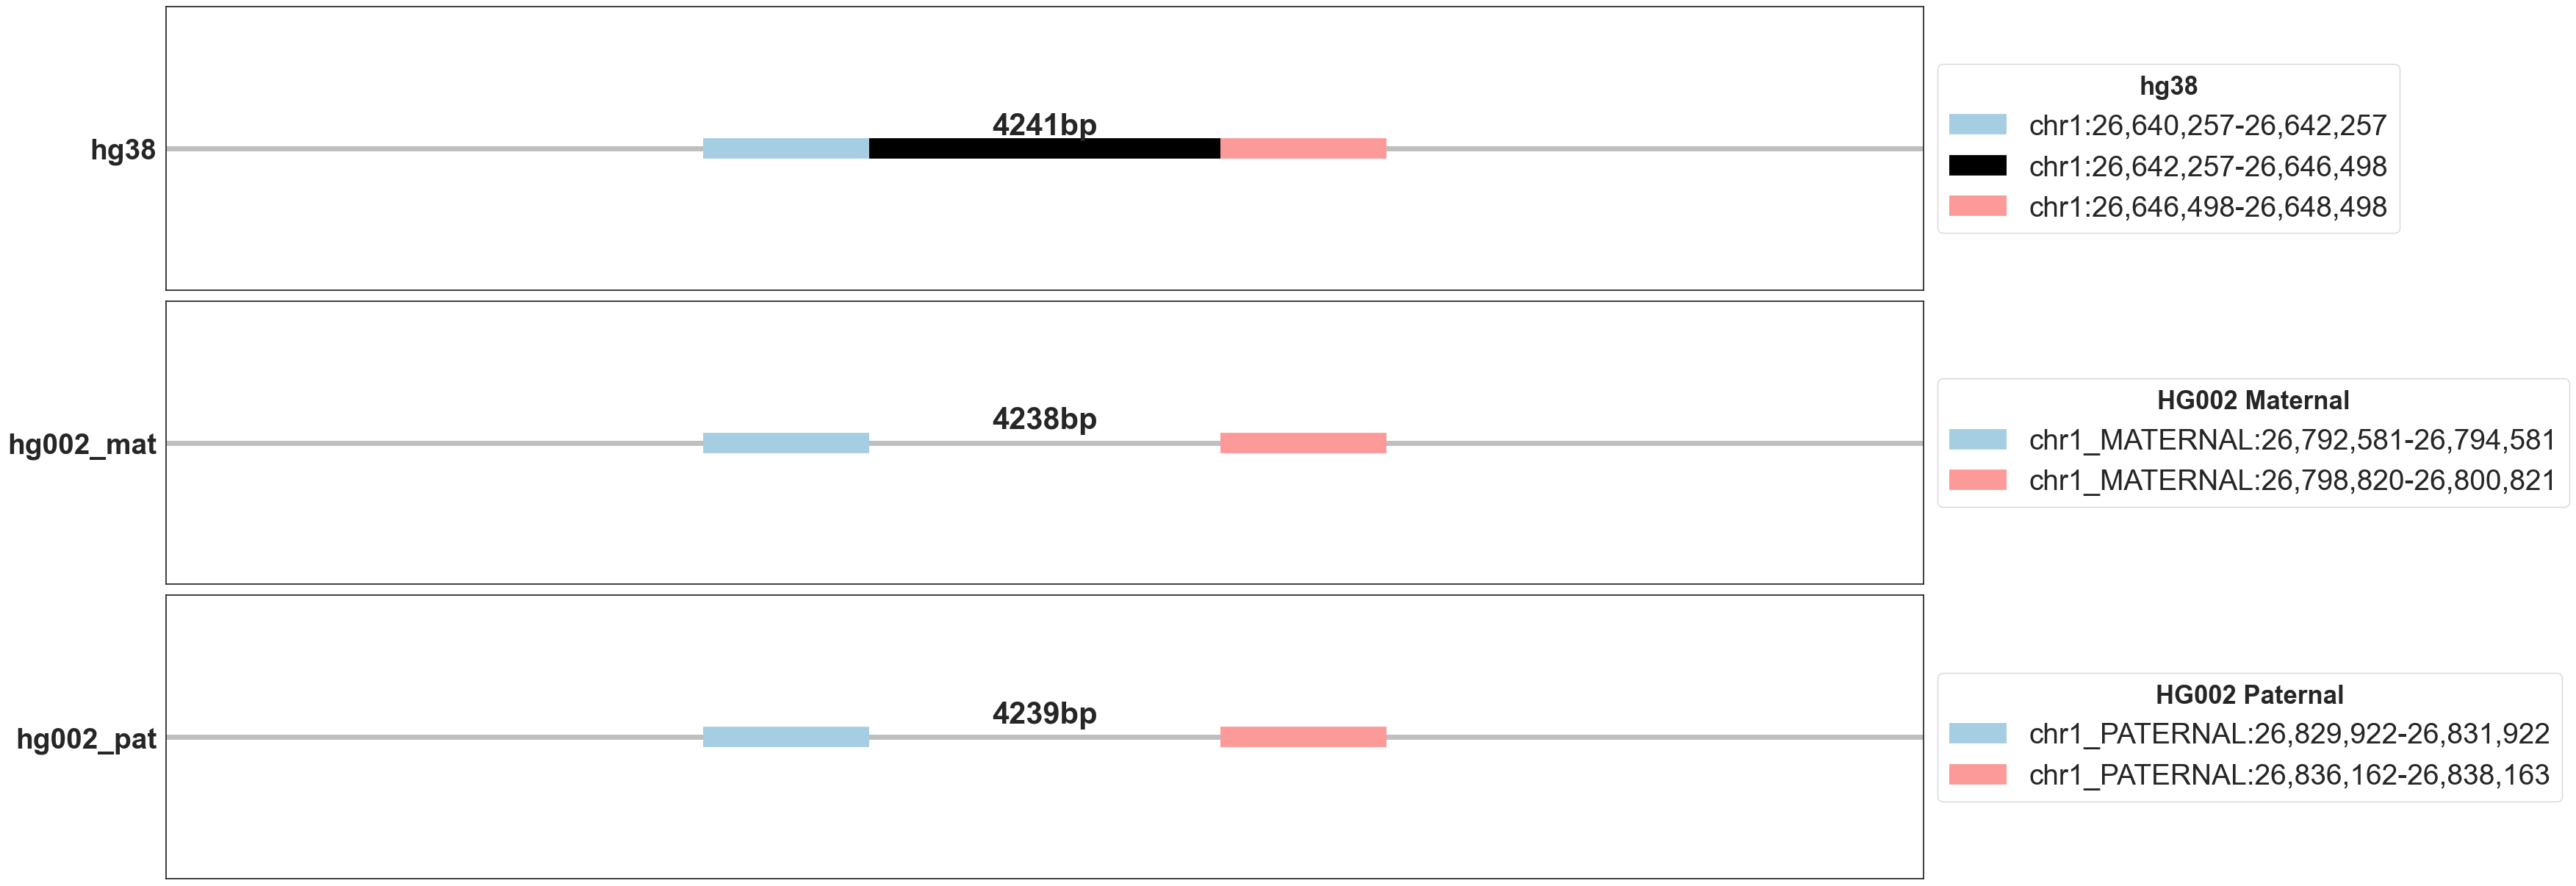

In [55]:
v.plot_del_flankings("chr1:26642257-26646498", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=5, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

In [48]:
len(merged_flanking_seq)

4002

In [47]:
hg2_test_ac_match

[['chr1_PATERNAL:26829922-26838163', -1, 0, 4002, 26838163, 26829922],
 ['chr1_MATERNAL:26792581-26800821', -1, 0, 4002, 26800821, 26792581]]

DEL interval: chr1:26642257-26646498 4242
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:26640257-26642257, 2001, 1, 2
right flanking interval: chr1:26646498-26648498, 2001, 2, 4
----------- No DEL Evidence -----------
chr1_MATERNAL:26798820-26800821 (2002bp), chr1_MATERNAL:26792581-26794581 (2001bp), 4238
----------- No DEL Evidence -----------
chr1_PATERNAL:26836162-26838163 (2002bp), chr1_PATERNAL:26829922-26831922 (2001bp), 4239
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_MATERNAL:26794580-26798821; Interval Between HG2 Aligned Flankings:chr1_MATERNAL:26794582-26798819; Overlapping:(100.0, 99.91)
*DEL HG2 alignment:chr1_PATERNAL:26831921-26836163; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:26831923-26836161; Overlapping:(100.0, 99.91)


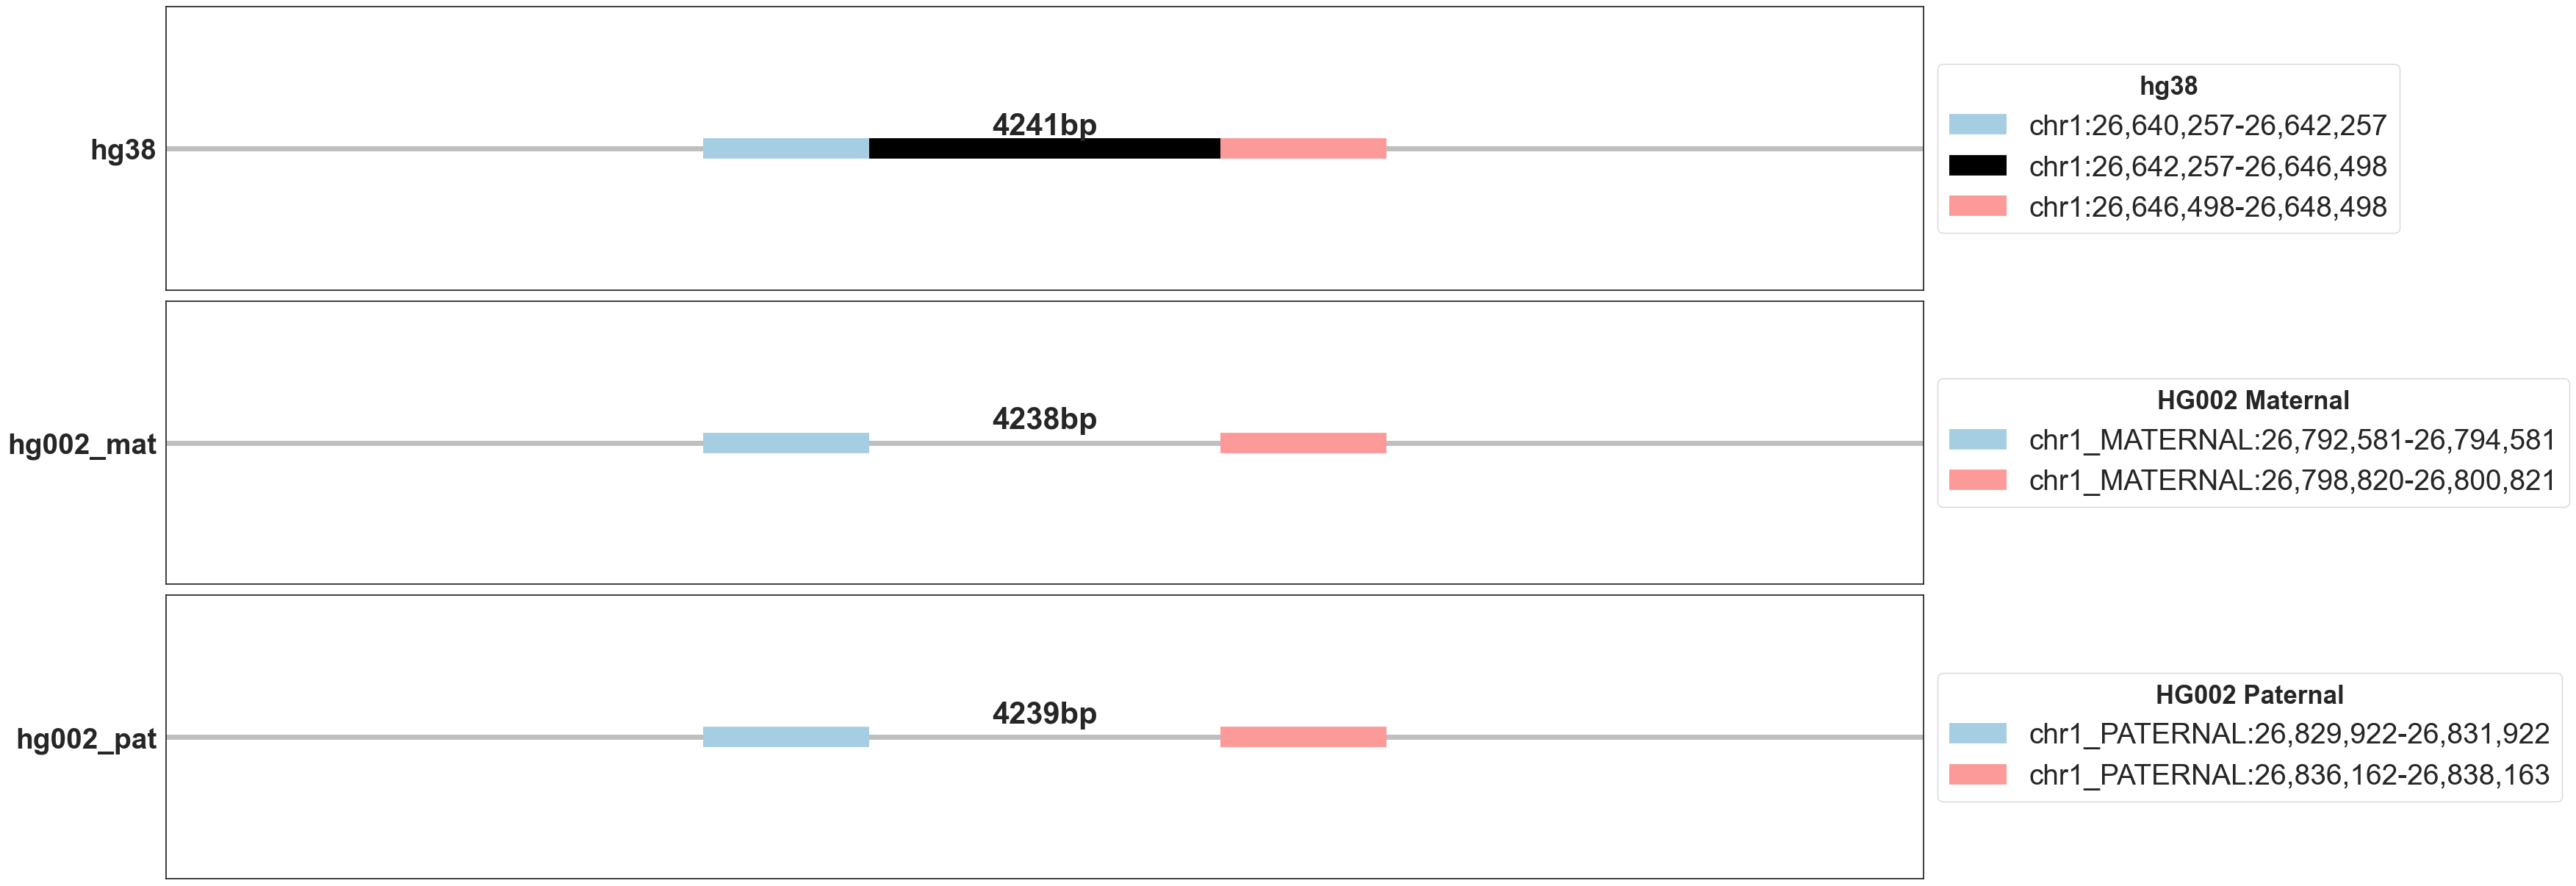

In [14]:
v.plot_del_flankings("chr1:26642257-26646498", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=5, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

DEL interval: chr1:45710241-45710903 663
DEL interval Alignments in hg38: 3
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:45708241-45710241, 2001, 1, 2
right flanking interval: chr1:45710903-45712903, 2001, 1, 2
merged flanking sequence: 4002, []
----------- No DEL Evidence -----------
chr1_PATERNAL:45931952-45933955 (2004bp), chr1_PATERNAL:45936618-45938618 (2001bp), 2662
----------- No DEL Evidence -----------
chr1_MATERNAL:45898056-45900063 (2008bp), chr1_MATERNAL:45902328-45904328 (2001bp), 2264
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr1_PATERNAL:45933558-45934221; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(9.99, 40.06)
DEL HG2 alignment:chr1_PATERNAL:45933164-45933823; Interval Between HG2 Aligned Flankings:chr1_PATERNAL:45933956-45936617; Overlapping:(-4.96, -20.0)
DEL HG2 alignment:chr1_MATERNAL:45899272-45899931; Interval Between HG2 Alig

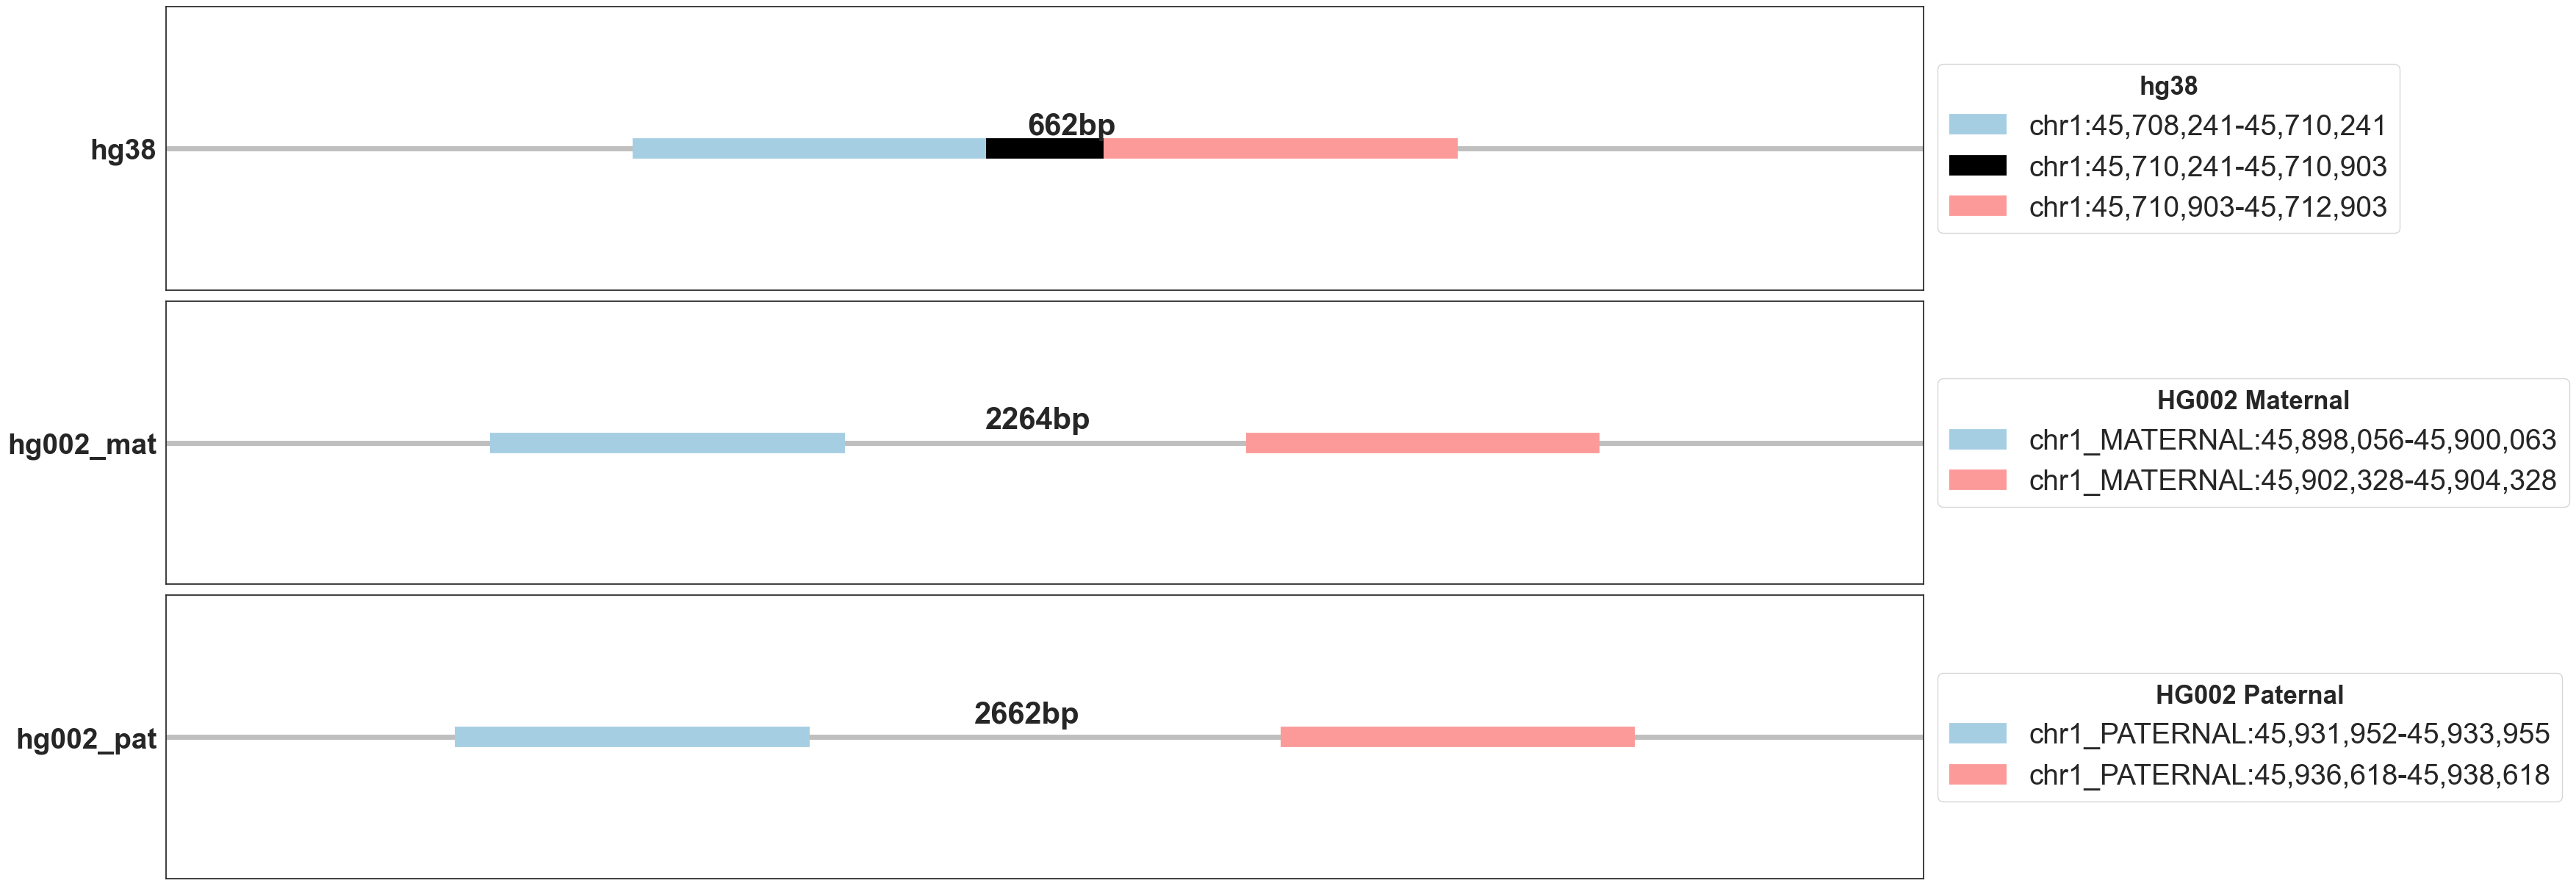

In [59]:
v.plot_del_flankings("chr1:45710241-45710903", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=15, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

DEL interval: chr1:1934989-1935584 596
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:1932989-1934989, 2001, 1, 2
right flanking interval: chr1:1935584-1937584, 2001, 1, 2
merged flanking sequence: 4002, ['chr1_MATERNAL:1370272-1374870', 'chr1_PATERNAL:1376204-1380208']
----------- No DEL Evidence -----------
chr1_MATERNAL:1370272-1372273 (2002bp), chr1_MATERNAL:1372867-1374870 (2004bp), 593
********** Potential DEL **********
chr1_PATERNAL:1376204-1378225 (2022bp), chr1_PATERNAL:1378207-1380208 (2002bp), -19


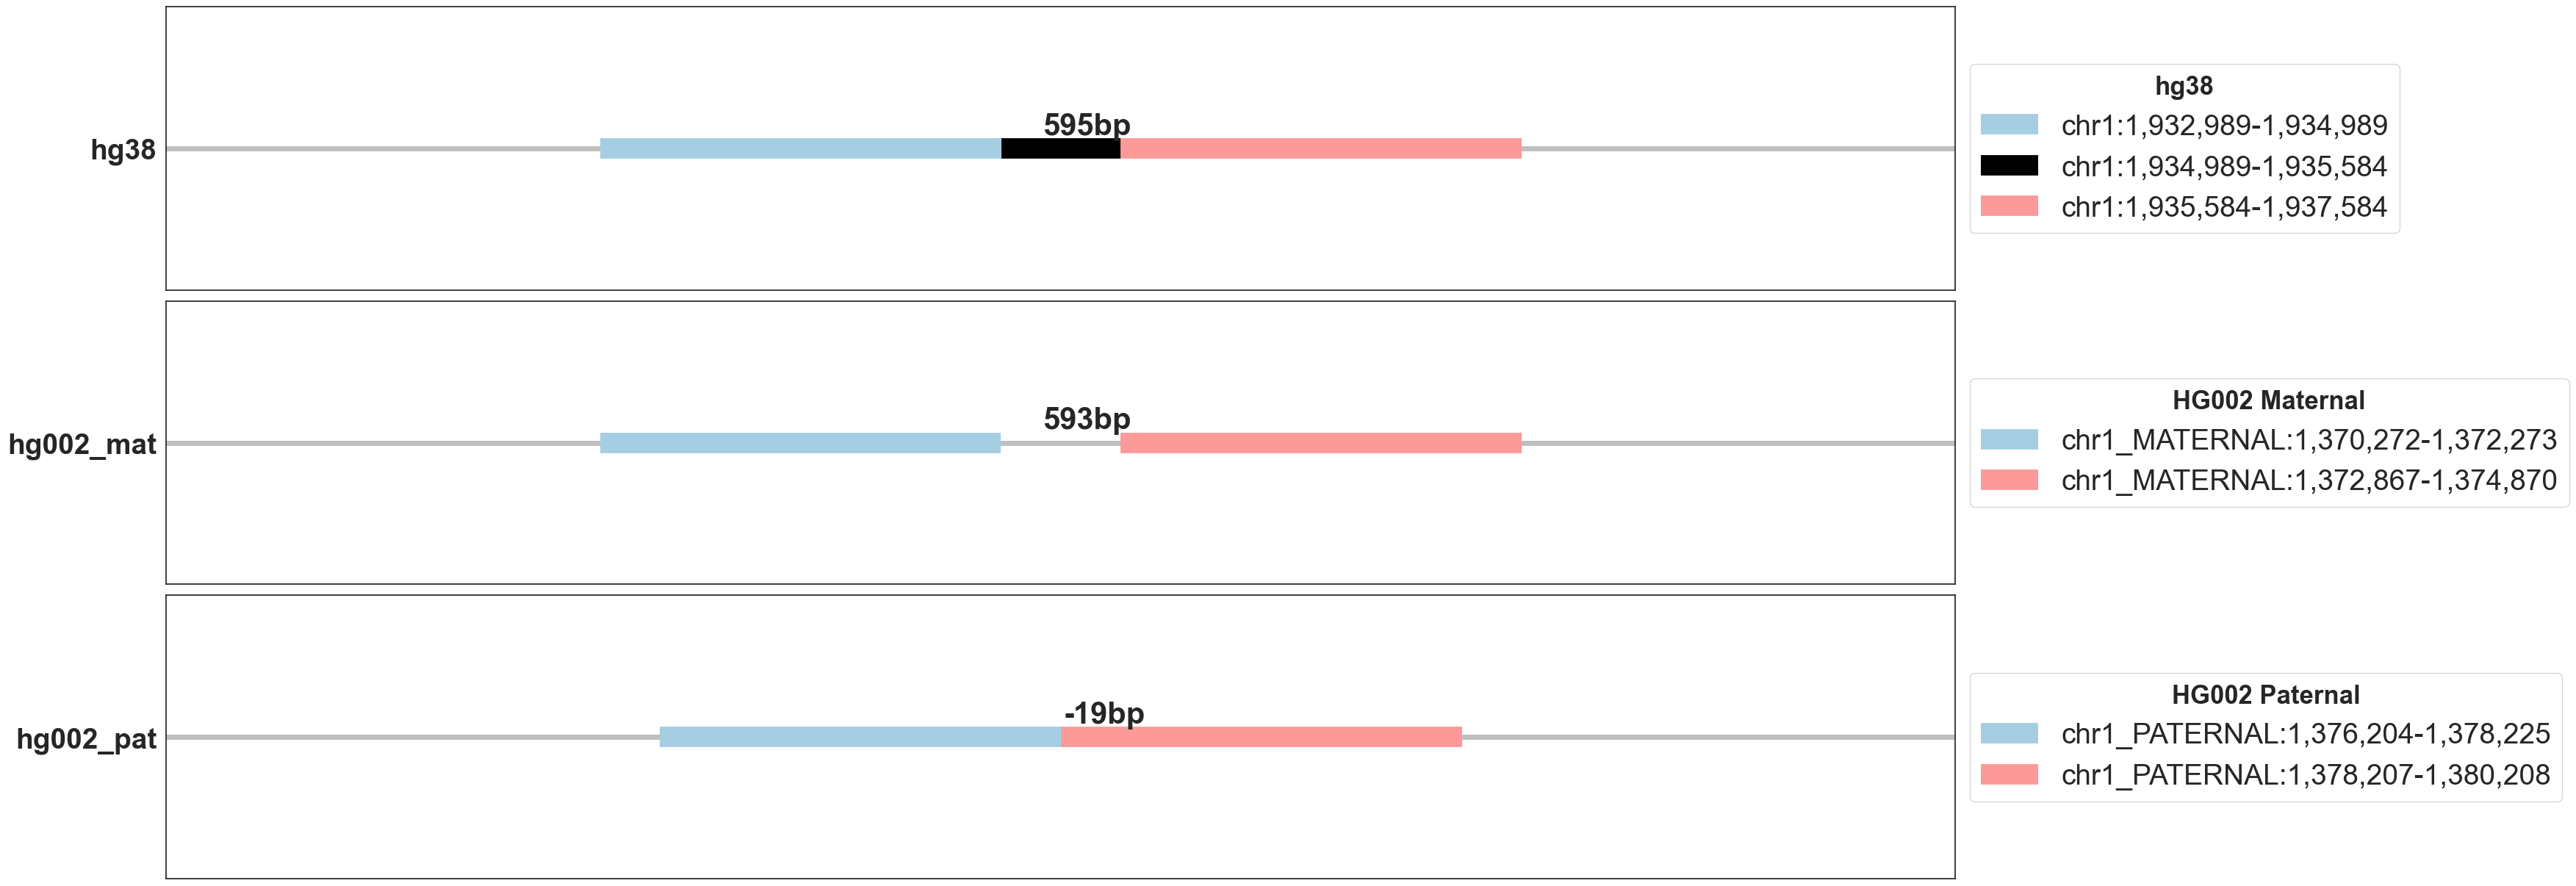

In [56]:
v.plot_del_flankings("chr1:1934989-1935584", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=15, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

DEL interval: chr1:72300640-72346156 45517
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 13655, copy_threshold: 2
left flanking interval: chr1:72286985-72300640, 13656, 1, 2
right flanking interval: chr1:72346156-72359811, 13656, 1, 2
merged flanking sequence: 27312, ['chr1_MATERNAL:72488721-72516030']
********** Potential DEL **********
chr1_MATERNAL:72488721-72502386 (13666bp), chr1_MATERNAL:72502386-72516030 (13645bp), -1
----------- No DEL Evidence -----------
chr1_PATERNAL:72513903-72527599 (13697bp), chr1_PATERNAL:72582583-72596215 (13633bp), 54983


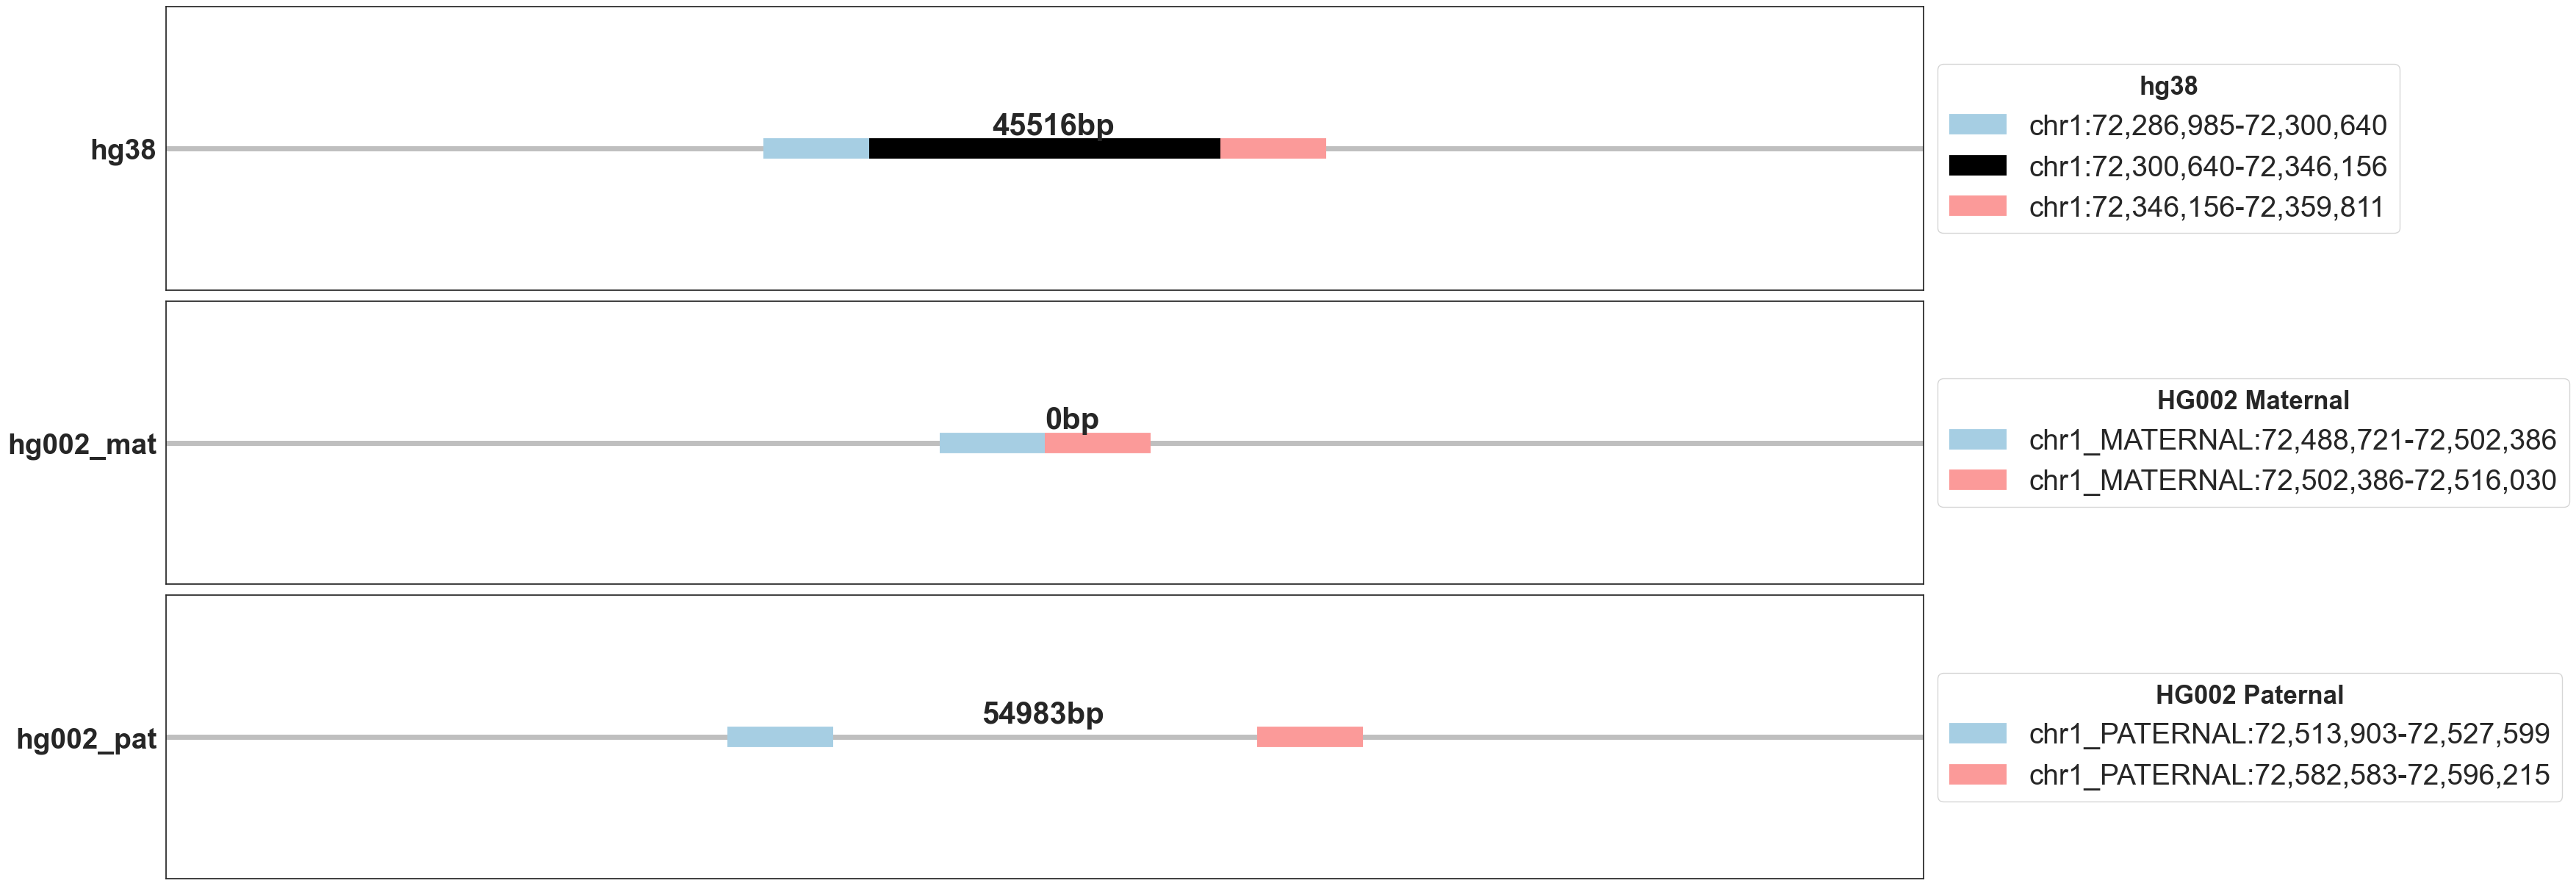

In [63]:
v.plot_del_flankings("chr1:72300640-72346156", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=5, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

DEL interval: chr1:3299666-3300276 611
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:3297666-3299666, 2001, 1, 2
right flanking interval: chr1:3300276-3302276, 2001, 1, 2
merged flanking sequence: 4002, ['chr1_PATERNAL:2918346-2922222', 'chr1_MATERNAL:2951749-2955625']
********** Potential DEL **********
chr1_PATERNAL:2918346-2920408 (2063bp), chr1_PATERNAL:2920225-2922222 (1998bp), -184
********** Potential DEL **********
chr1_MATERNAL:2951749-2953811 (2063bp), chr1_MATERNAL:2953628-2955625 (1998bp), -184


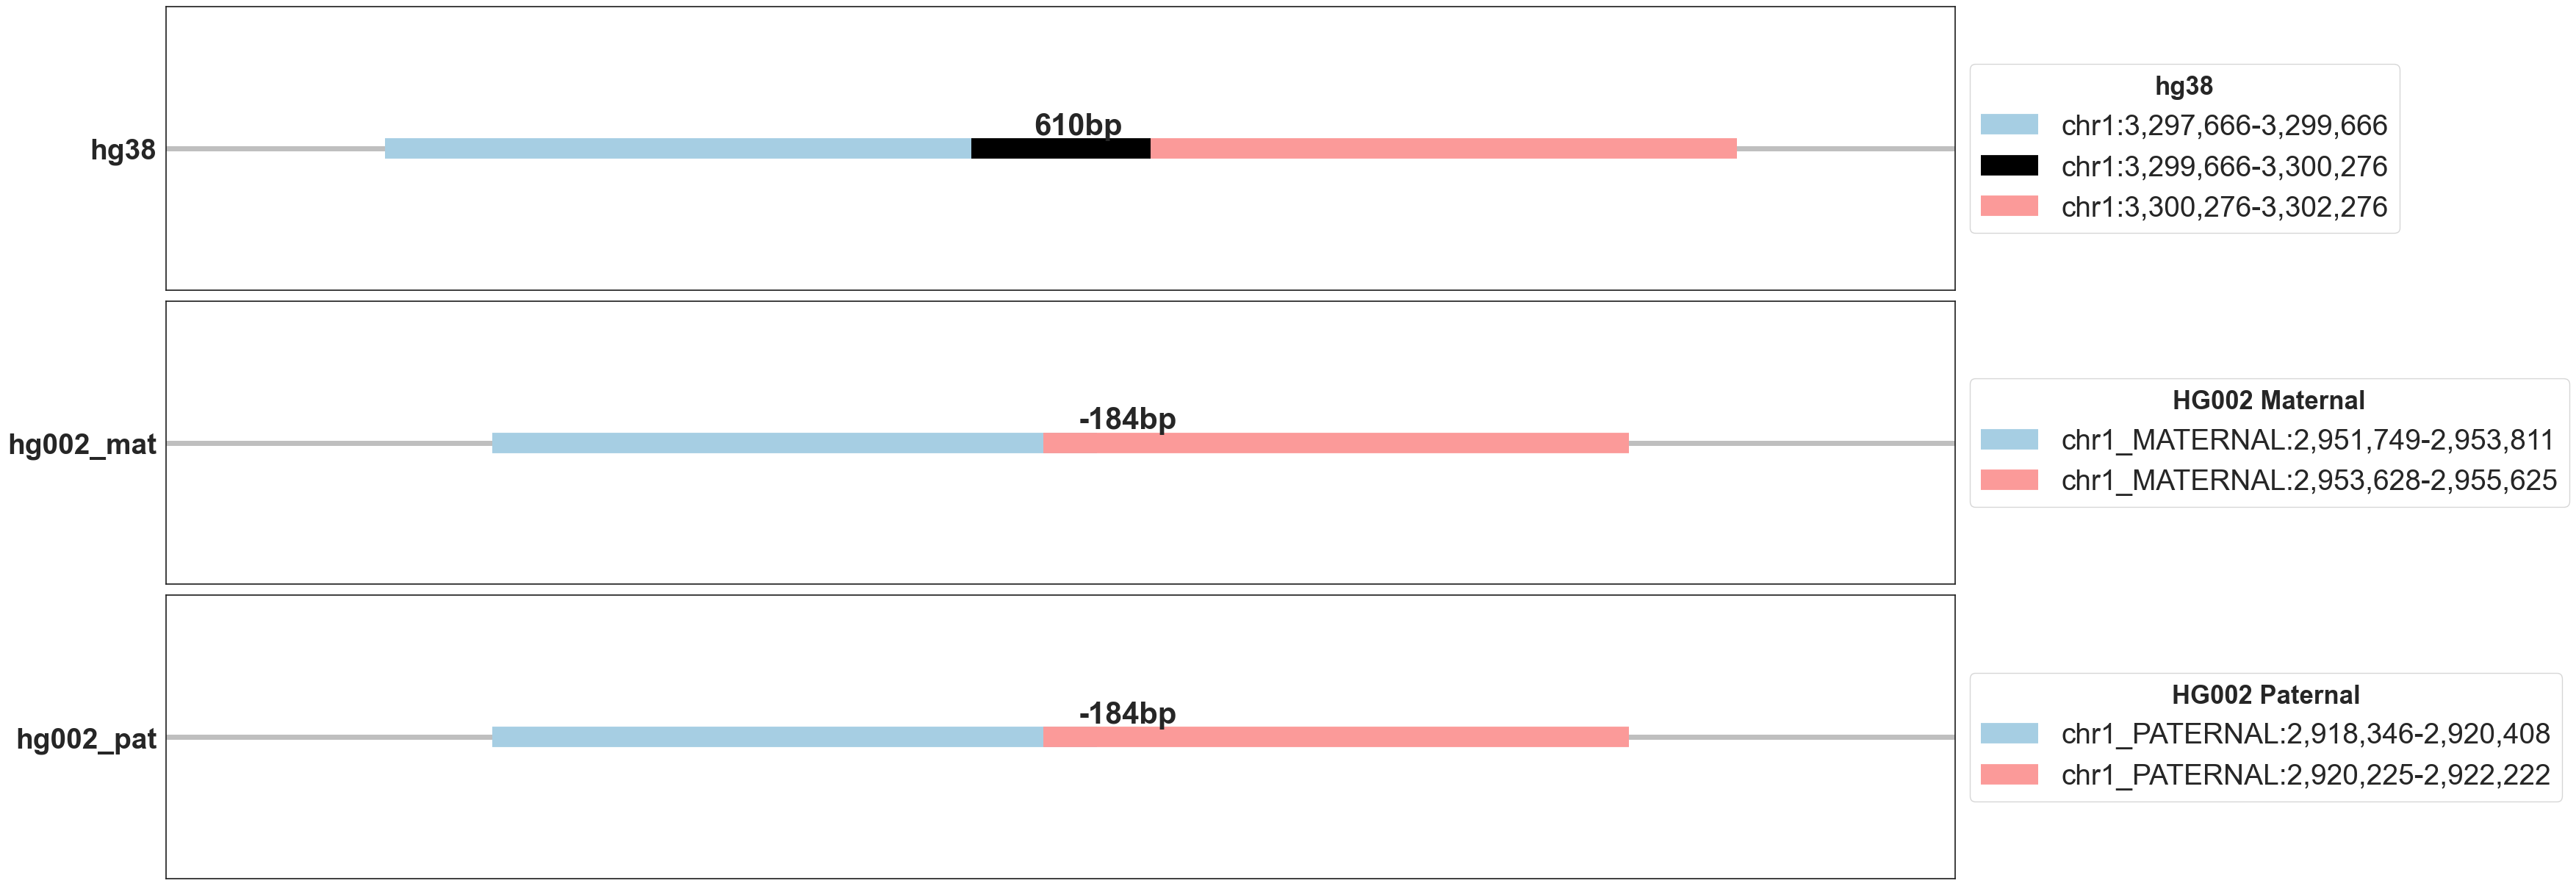

In [58]:
v.plot_del_flankings("chr1:3299666-3300276", ReferenceLocations.hg38, hg38_primary, hg002t2t, plot_ratio=10, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/plots/')

In [21]:
ont_read_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1876/FP_investigation/fasta/chr1_26642257_4241bp.fasta"
with open(ont_read_path, 'r') as f:
    ont_read = f.read().strip()
ont_read
#right_flank_hg002t2t_hits = [_ for _ in t2t_aligner.map(right_flank)]

'TTATTTTATTTATTTATTTTTTTTGAGACAGGGTCCTGCTCTGTTACCCAGGCTGGAGTGCAGTGGTGCGATCTCGGCTCACTGCAACTTCCCTCACCGGGCTCAAGCGATTCTCCTGCCTCAGCTTTTTGAGTAGCTGGGACTACAGGTGTGTGCCACCACTCCCGGCTAAGTTTTGTATATTTAGTAGAGACGGGATTTCACCATGTTGGCCCTGCTGGTCTTGAACTCCTGACCTCAGGTGATCTGCCCGCCTCGGCATCACAAAGTGCTGGGATTACAGGCATGAGCCACCGGGCCCGGCCTGCCCCTTTTAACTTTCTATATTTTCTTCCATACAAATAATATTTATTATTATTATTATTATTTTTAGACGAACTCACCCTCTTGTCCCCCAGGCTGGAGTGCGATGGTGTGATCTCAGCTCACTGCAATCTCTGCCTCTTGGGCTCAAGCGATTCTCCTGCCTCAGCCTCCCAAGTAGCTGGGATTACAGGCACCTGCCTCCACGCCCAGCTAGTTTTTGTATTTTTAGTAGAGATGGGGTTTCACTGTGTTGGCCAGGTTAGTCTTGAATTCCTGACCTTGTGATCCACCTGCTTTGGCCTCCCAAAGTGCTATGATTACAAGTGTGAGCCACCGCACCCCCCACCATAAAAACTTCTTAATAAATTGGCCAGGATGATCTTGTTCTTCTCTTCTATCCTGTTAAACATTCTACTACCAGTGTTTCCTGAGCCAACCATATTCCTTGAAATAATGCTAGGTGTTCAGGGTGAAGTAAATTTAGTAAATACTGCATATTATATCCCTCTCTTGGATATAGTCATAATTCATATTAGTATAATAAAGGCCCTCAGAAGGTCTACAGTGAAAGAAATCTGCTTAATTTTGTTTAGCTTATTGTACTTAGGCAGACCTTTTTTTTTTTTCTGAGATGAAGTCTGGCTGTGTTGCTCAGGCTGTAGTGCAGTGGTGCGATCTTGGCTCACTGCAACC

In [27]:
print(len(ont_read))

13680


In [35]:
#ont_read_hg002t2t_hits = [_ for _ in hg002t2t.map(ont_read)]
hg2_ont_match = [[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en, _.r_en, _.r_st] for _ in hg002t2t.map(ont_read)]
[(i[5]-i[4]+1) for i in hg2_ont_match]

[-13680, -13682]

In [36]:
hg38_ont_match = [[v.extract_interval_from_hit(_), _.strand, _.q_st, _.q_en, _.r_en, _.r_st] for _ in hg38_primary.map(ont_read)]
[(i[5]-i[4]+1) for i in hg38_ont_match]

[-13690]

In [ ]:
## Test cigar string for a TP 
v.get_sequence_from_interval(ReferenceLocations.hg38, 'chr1:26642257-26646498')

In [120]:
v.collect_del_flankings("chr4:107142040-107154888", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr4:107142040-107154888 12849
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 1
flanking_size: 3854, copy_threshold: 2
left flanking interval: chr4:107138186-107142040, 3855, 1, 2
right flanking interval: chr4:107154888-107158742, 3855, 1, 2
********** Potential DEL **********
chr4_MATERNAL:108520260-108524109 (3850bp), chr4_MATERNAL:108524107-108527961 (3855bp), -3
----------- No DEL Evidence -----------
chr4_PATERNAL:109324423-109328282 (3860bp), chr4_PATERNAL:109341122-109344977 (3856bp), 12839


{'del_interval': 'chr4:107142040-107154888',
 'del_interval_size': 12849,
 'flanking_size': 3854,
 'left_flanking_interval': 'chr4:107138186-107142040',
 'right_flanking_interval': 'chr4:107154888-107158742',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [-3, 12839],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr4:107142040-107154888',
  'chr4:107138186-107142040',
  'chr4:107154888-107158742'],
 'hg2_plotting_flanking_intervals': ['chr4_MATERNAL:108520260-108524109',
  'chr4_PATERNAL:109324423-109328282',
  'chr4_MATERNAL:108524107-108527961',
  'chr4_PATERNAL:109341122-109344977'],
 'classification': 'DEL',
 'minor_classification': 'Heterozygous DEL'}

In [123]:
3854/12849

0.29994552105222194

In [122]:
v.align_interval("chr4:107142040-107154888", ReferenceLocations.hg38, hg38, hg002t2t)

([['chr4:107142039-107154888', 1, 0, 12849]],
 [['chr4_PATERNAL:109328271-109341123', 1, 0, 12849]])

In [129]:
v.collect_del_flankings("chr1:6006003-6006574", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr1:6006003-6006574 572
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 3
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:6004003-6006003, 2001, 1, 2
right flanking interval: chr1:6006574-6008574, 2001, 1, 2
----------- No DEL Evidence -----------
chr1_PATERNAL:5646078-5647916 (1839bp), chr1_PATERNAL:5649095-5651101 (2007bp), 1178
********** Potential DEL **********
chr1_MATERNAL:5681347-5683427 (2081bp), chr1_MATERNAL:5683503-5685516 (2014bp), 75


{'del_interval': 'chr1:6006003-6006574',
 'del_interval_size': 572,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr1:6004003-6006003',
 'right_flanking_interval': 'chr1:6006574-6008574',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1178, 75],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr1:6006003-6006574',
  'chr1:6004003-6006003',
  'chr1:6006574-6008574'],
 'hg2_plotting_flanking_intervals': ['chr1_PATERNAL:5646078-5647916',
  'chr1_MATERNAL:5681347-5683427',
  'chr1_PATERNAL:5649095-5651101',
  'chr1_MATERNAL:5683503-5685516'],
 'classification': 'DEL',
 'minor_classification': 'Heterozygous DEL'}

In [128]:
v.align_interval("chr1:6006003-6006574", ReferenceLocations.hg38, hg38, hg002t2t)[1]

[['chr1_PATERNAL:5648584-5649170', 1, 0, 572],
 ['chr1_PATERNAL:5648701-5649278', 1, 0, 561],
 ['chr1_PATERNAL:5648662-5649278', 1, 0, 561]]

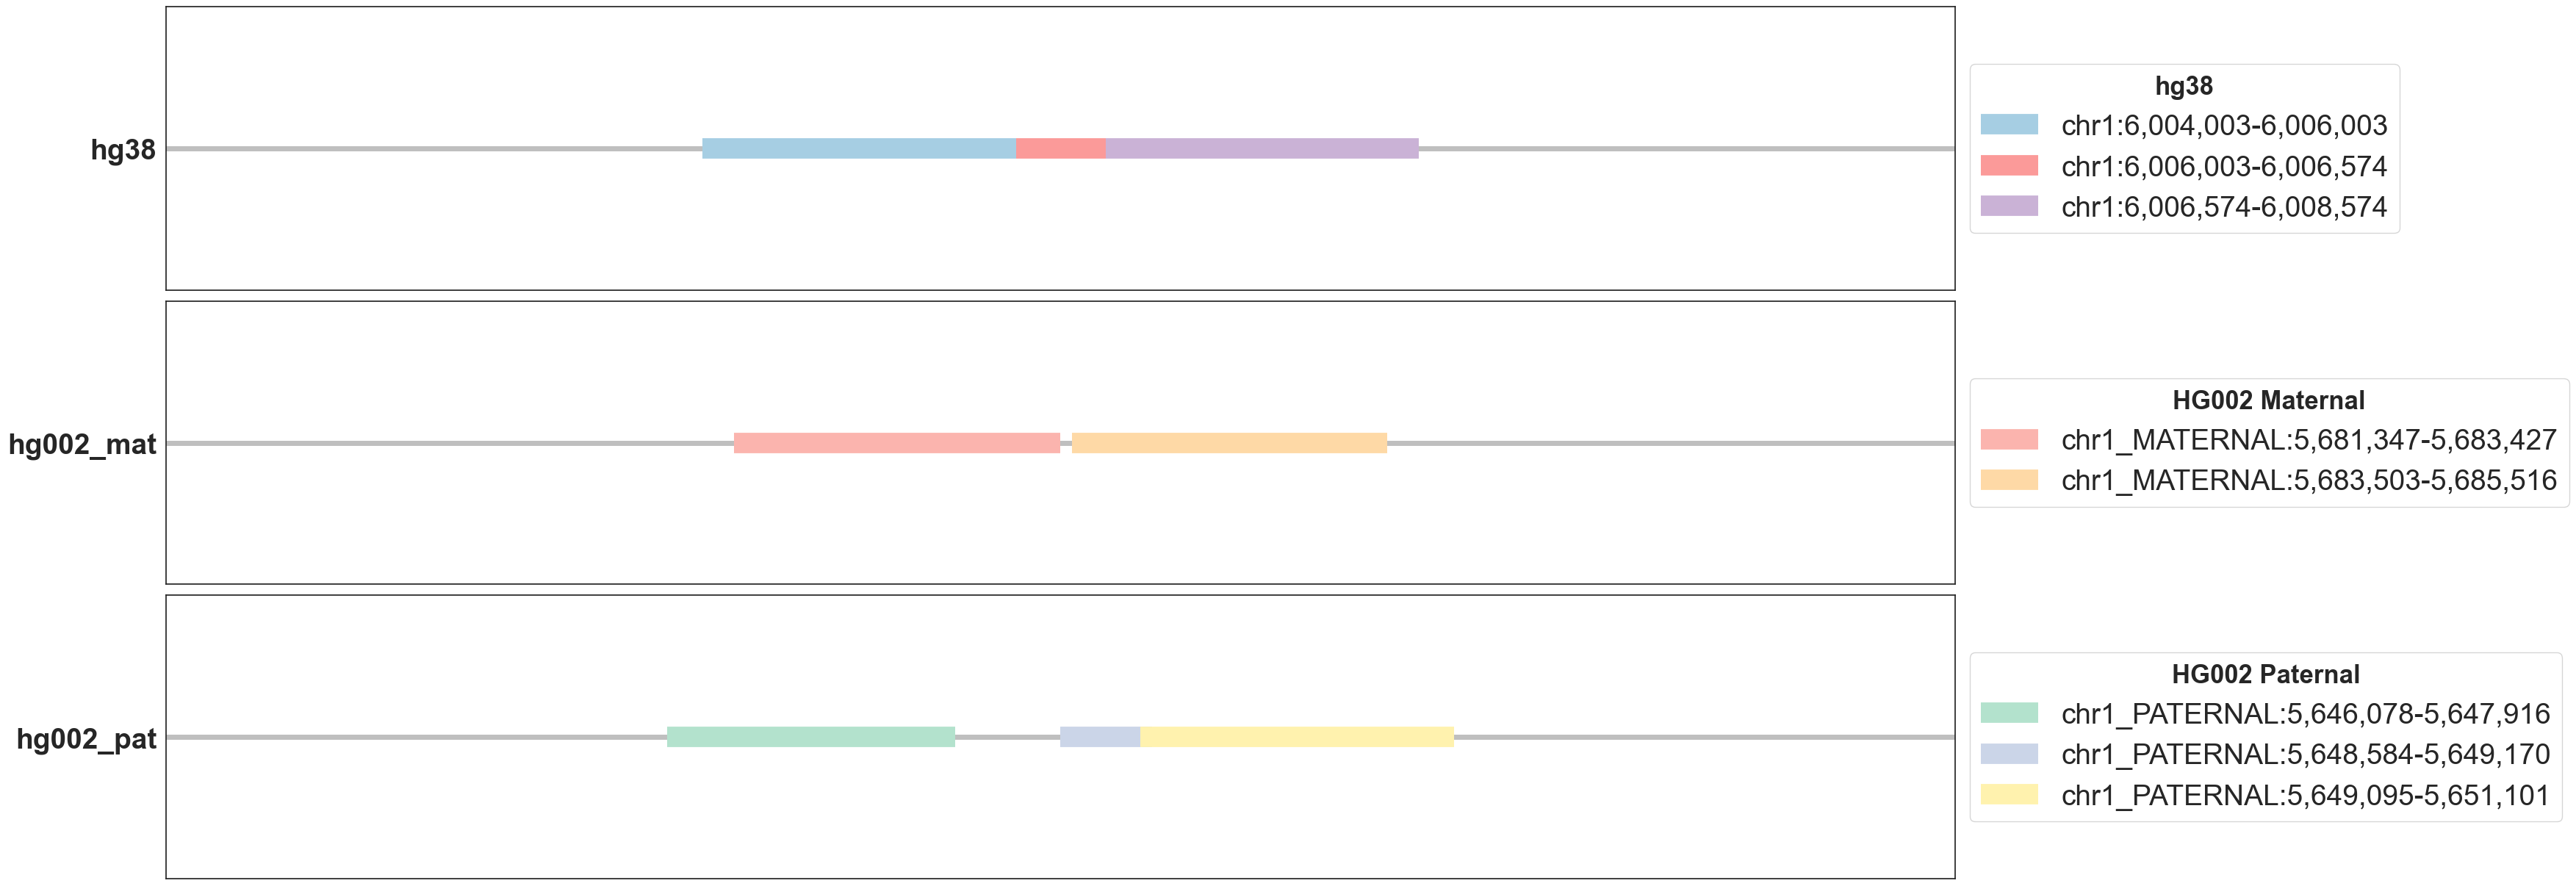

In [138]:
import T2T_ACE.alignment_visualization_utilities as avu
importlib.reload(avu)
avu.PlotIntervals(['chr1:6006003-6006574',
  'chr1:6004003-6006003',
  'chr1:6006574-6008574'], ['chr1_PATERNAL:5646078-5647916',
  'chr1_MATERNAL:5681347-5683427',
  'chr1_PATERNAL:5649095-5651101',
  'chr1_MATERNAL:5683503-5685516','chr1_PATERNAL:5648584-5649170']).plot_intervals_comparison(flanking=False, save=True, savepath='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/', ratio=20)

DEL interval: chr1:108190708-108194629 3922
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr1:108188708-108190708, 2001, 1, 2
right flanking interval: chr1:108194629-108196629, 2001, 1, 2
********** Potential DEL **********
chr1_PATERNAL:108446062-108448057 (1996bp), chr1_PATERNAL:108448074-108450074 (2001bp), 16
********** Potential DEL **********
chr1_MATERNAL:108363328-108365323 (1996bp), chr1_MATERNAL:108365340-108367340 (2001bp), 16


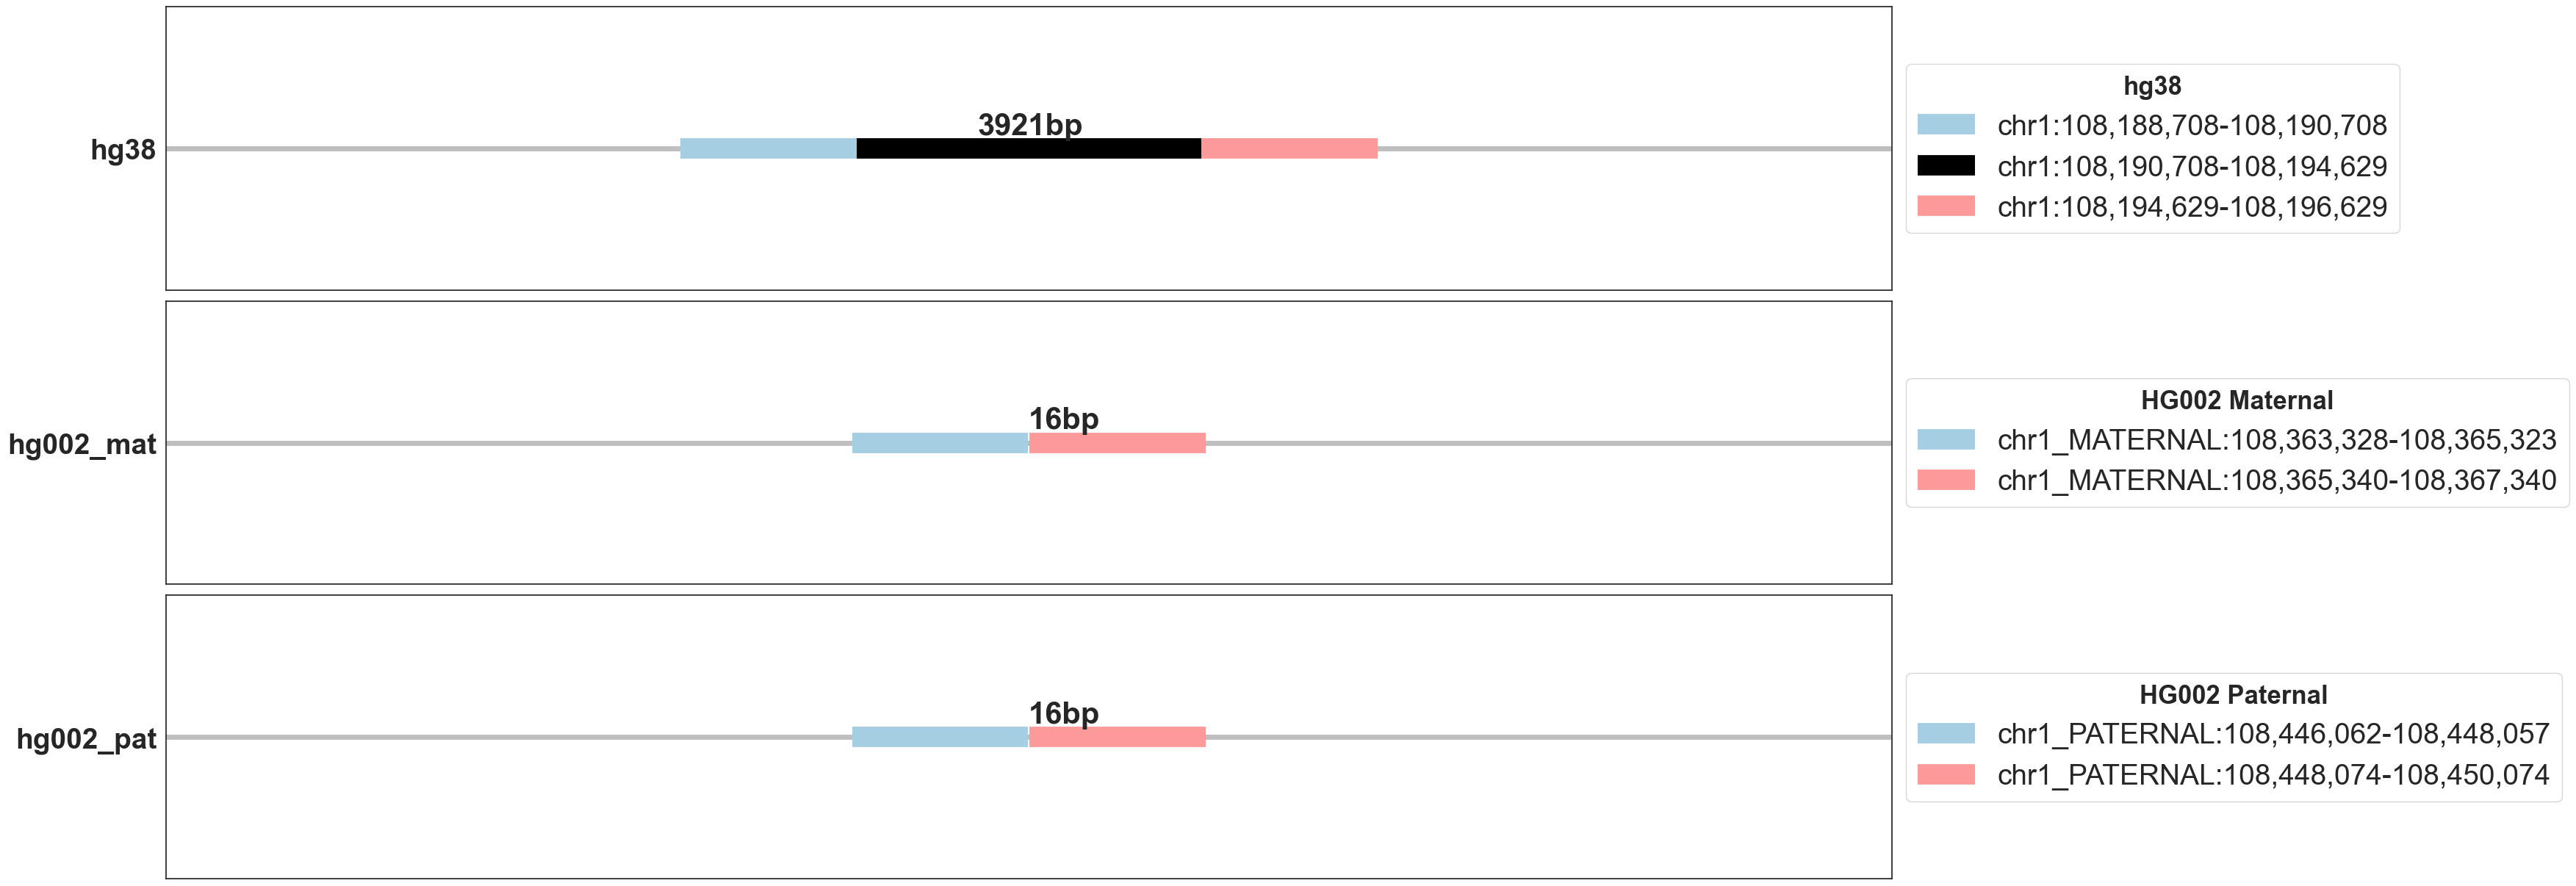

In [142]:
v.plot_del_flankings("chr1:108190708-108194629", ReferenceLocations.hg38, hg38, hg002t2t, plot_ratio=5, save_plot=True,save_plot_path='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')

In [143]:
v.collect_del_flankings("chr16:34176544-34178323", ReferenceLocations.hg38, hg38, hg002t2t)

DEL interval: chr16:34176544-34178323 1780
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 2
flanking_size: 2000, copy_threshold: 2
left flanking interval: chr16:34174544-34176544, 2001, 1, 2
right flanking interval: chr16:34178323-34180323, 2001, 1, 2
----------- No DEL Evidence -----------
chr16_PATERNAL:34787523-34789524 (2002bp), chr16_PATERNAL:34791302-34793303 (2002bp), 1777
----------- No DEL Evidence -----------
chr16_MATERNAL:35988632-35990633 (2002bp), chr16_MATERNAL:35992411-35994412 (2002bp), 1777
----------- Checking DEL Sequence Alignment in HG2 -----------
*DEL HG2 alignment:chr16_PATERNAL:34789523-34791303; Interval Between HG2 Aligned Flankings:chr16_PATERNAL:34789525-34791301; Overlapping:(100.0, 99.78)
*DEL HG2 alignment:chr16_MATERNAL:35990632-35992412; Interval Between HG2 Aligned Flankings:chr16_MATERNAL:35990634-35992410; Overlapping:(100.0, 99.78)


{'del_interval': 'chr16:34176544-34178323',
 'del_interval_size': 1780,
 'flanking_size': 2000,
 'left_flanking_interval': 'chr16:34174544-34176544',
 'right_flanking_interval': 'chr16:34178323-34180323',
 'left_flanking_hg38_hits': 1,
 'right_flanking_hg38_hits': 1,
 'left_flanking_hg2_hits': 2,
 'right_flanking_hg2_hits': 2,
 'distance_between_flankings': [1777, 1777],
 'flanking_connection_strand': ['POS', 'POS'],
 'hg38_plotting_flanking_intervals': ['chr16:34176544-34178323',
  'chr16:34174544-34176544',
  'chr16:34178323-34180323'],
 'hg2_plotting_flanking_intervals': ['chr16_PATERNAL:34787523-34789524',
  'chr16_MATERNAL:35988632-35990633',
  'chr16_PATERNAL:34791302-34793303',
  'chr16_MATERNAL:35992411-35994412'],
 'classification': 'False DEL',
 'minor_classification': 'False DEL'}

DEL interval: chr3:146667401-146677074 9674
DEL interval Alignments in hg38: 1
DEL interval Alignments in HG2: 0
flanking_size: 2902, copy_threshold: 2
left flanking interval: chr3:146664499-146667401, 2903, 1, 2
right flanking interval: chr3:146677074-146679976, 2903, 1, 2
********** Potential DEL **********
chr3_MATERNAL:149215354-149218257 (2904bp), chr3_MATERNAL:149223018-149225922 (2905bp), 4760
********** Potential DEL **********
chr3_PATERNAL:149635962-149638866 (2905bp), chr3_PATERNAL:149643631-149646533 (2903bp), 4764


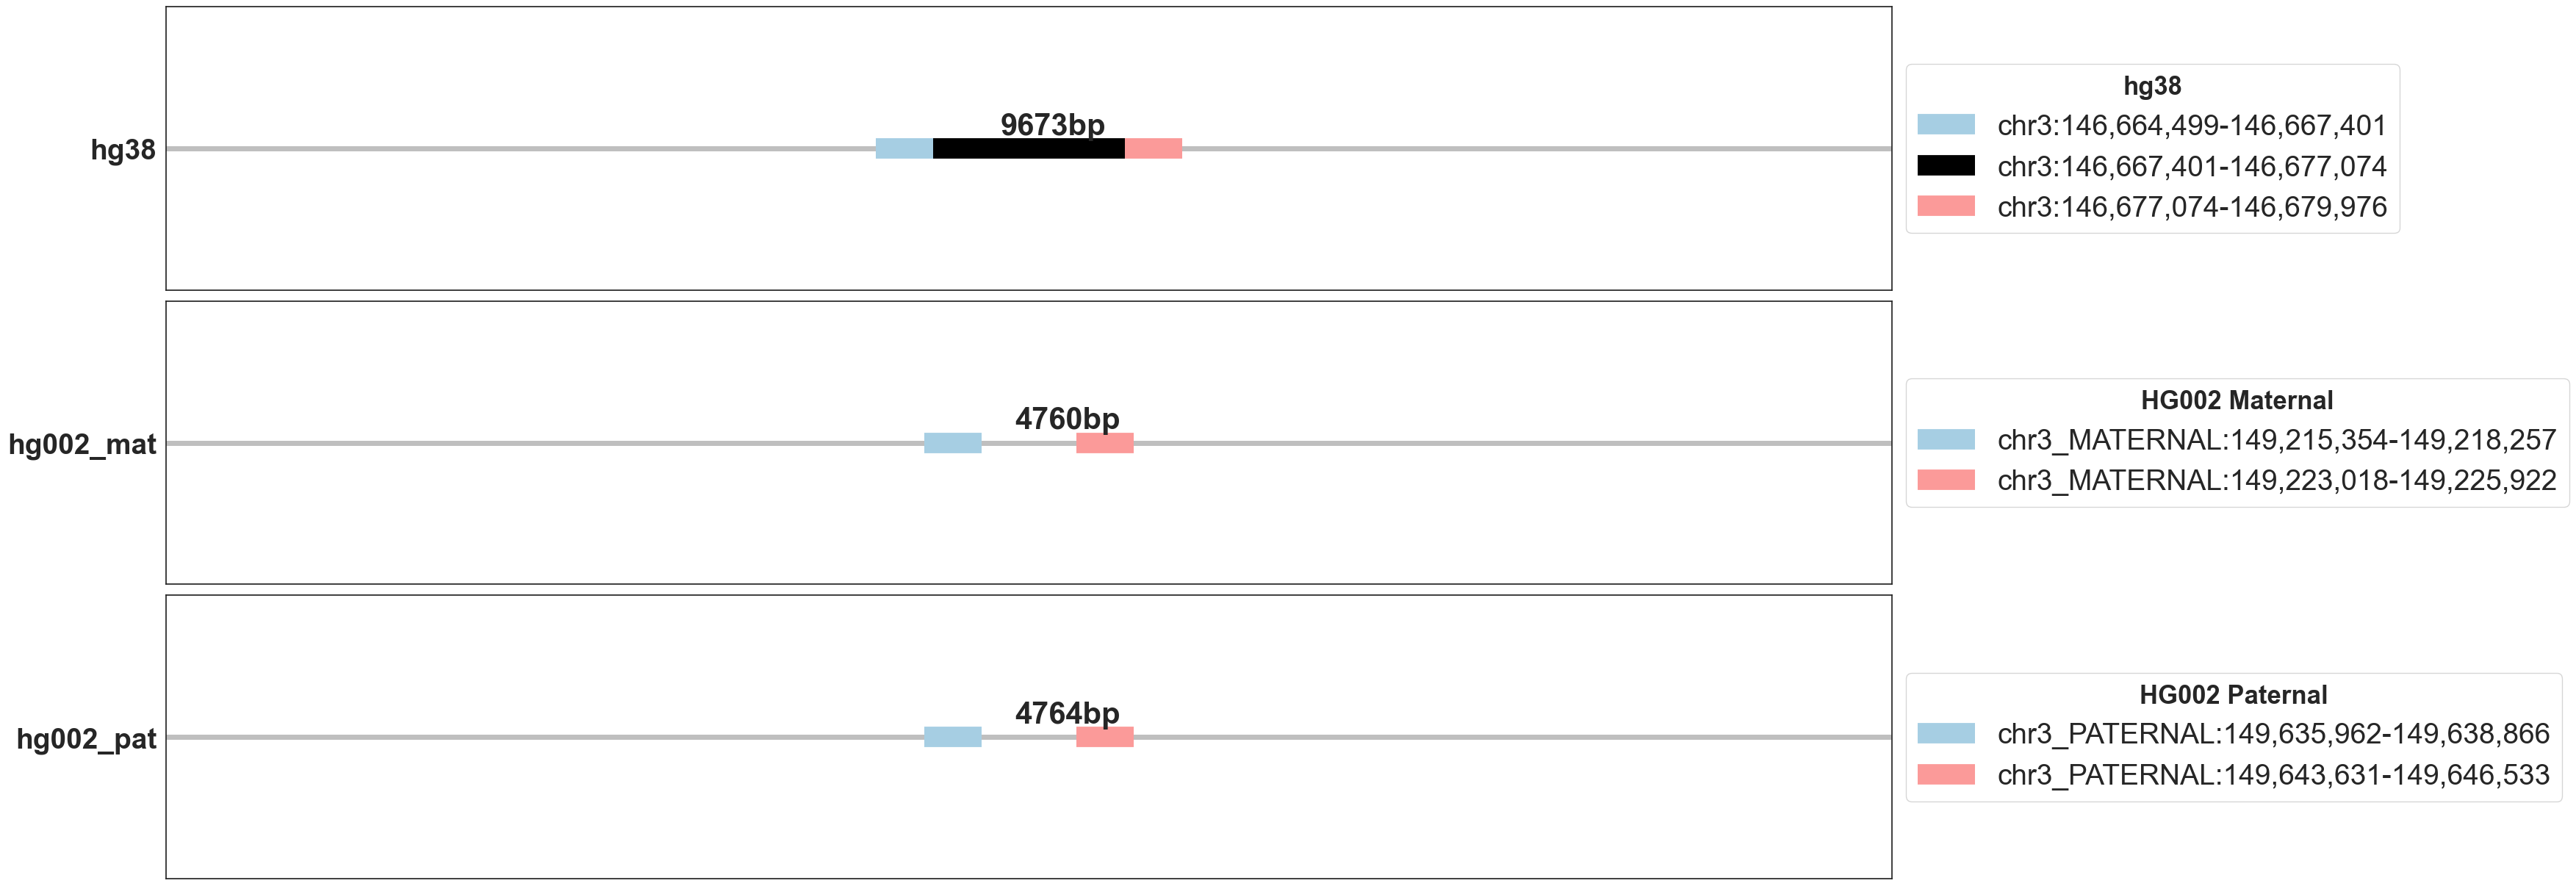

In [156]:
v.plot_del_flankings("chr3:146667401-146677074", ReferenceLocations.hg38, hg38, hg002t2t, plot_ratio=9, save_plot=False,save_plot_path='/Users/gaoyueya/Documents/GitHub/T2T-ACE/docs/')